In [2]:
from problem import *

IndentationError: unindent does not match any outer indentation level (problem.py, line 375)

In [1]:
%matplotlib inline

In [1]:
from IPython.display import Image

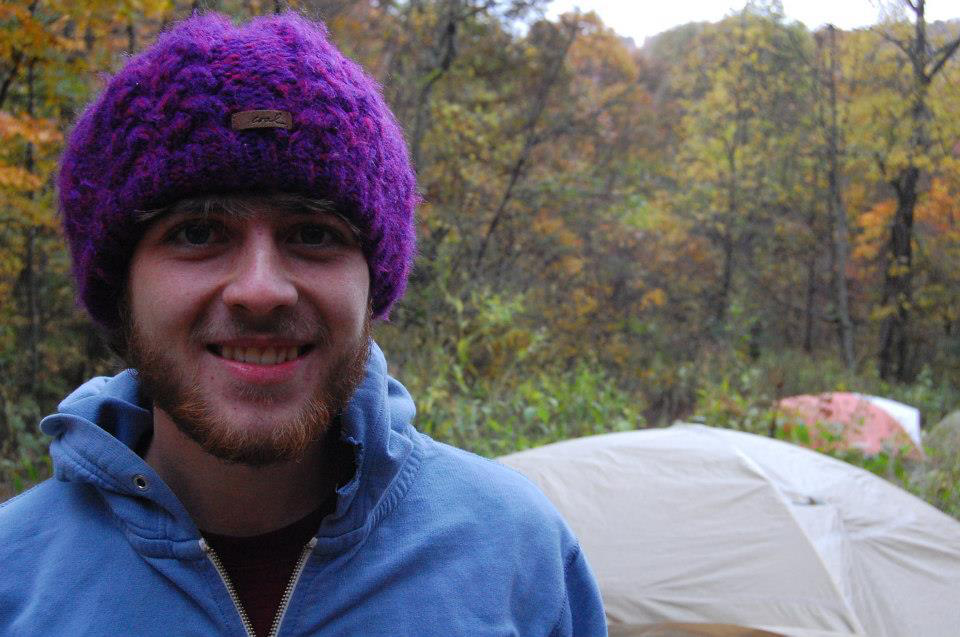

In [2]:
Image("/Users/shalom/Downloads/alex.png")

# Heading
## Smaller heading
thing i'm saying. [according to my colleague](http://hiswebsite.com/researchartifact.html) this is called into question

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
plt.polar(np.linspace(0,2 * math.pi,50), np.linspace(0,10,50))

Preparing problem instance.
Azure_Services_Platform does not exist
Http does not exist
United_Fruit does not exist
Filling tables with query results
Reducing the query tables.
Beginning the plotting process.


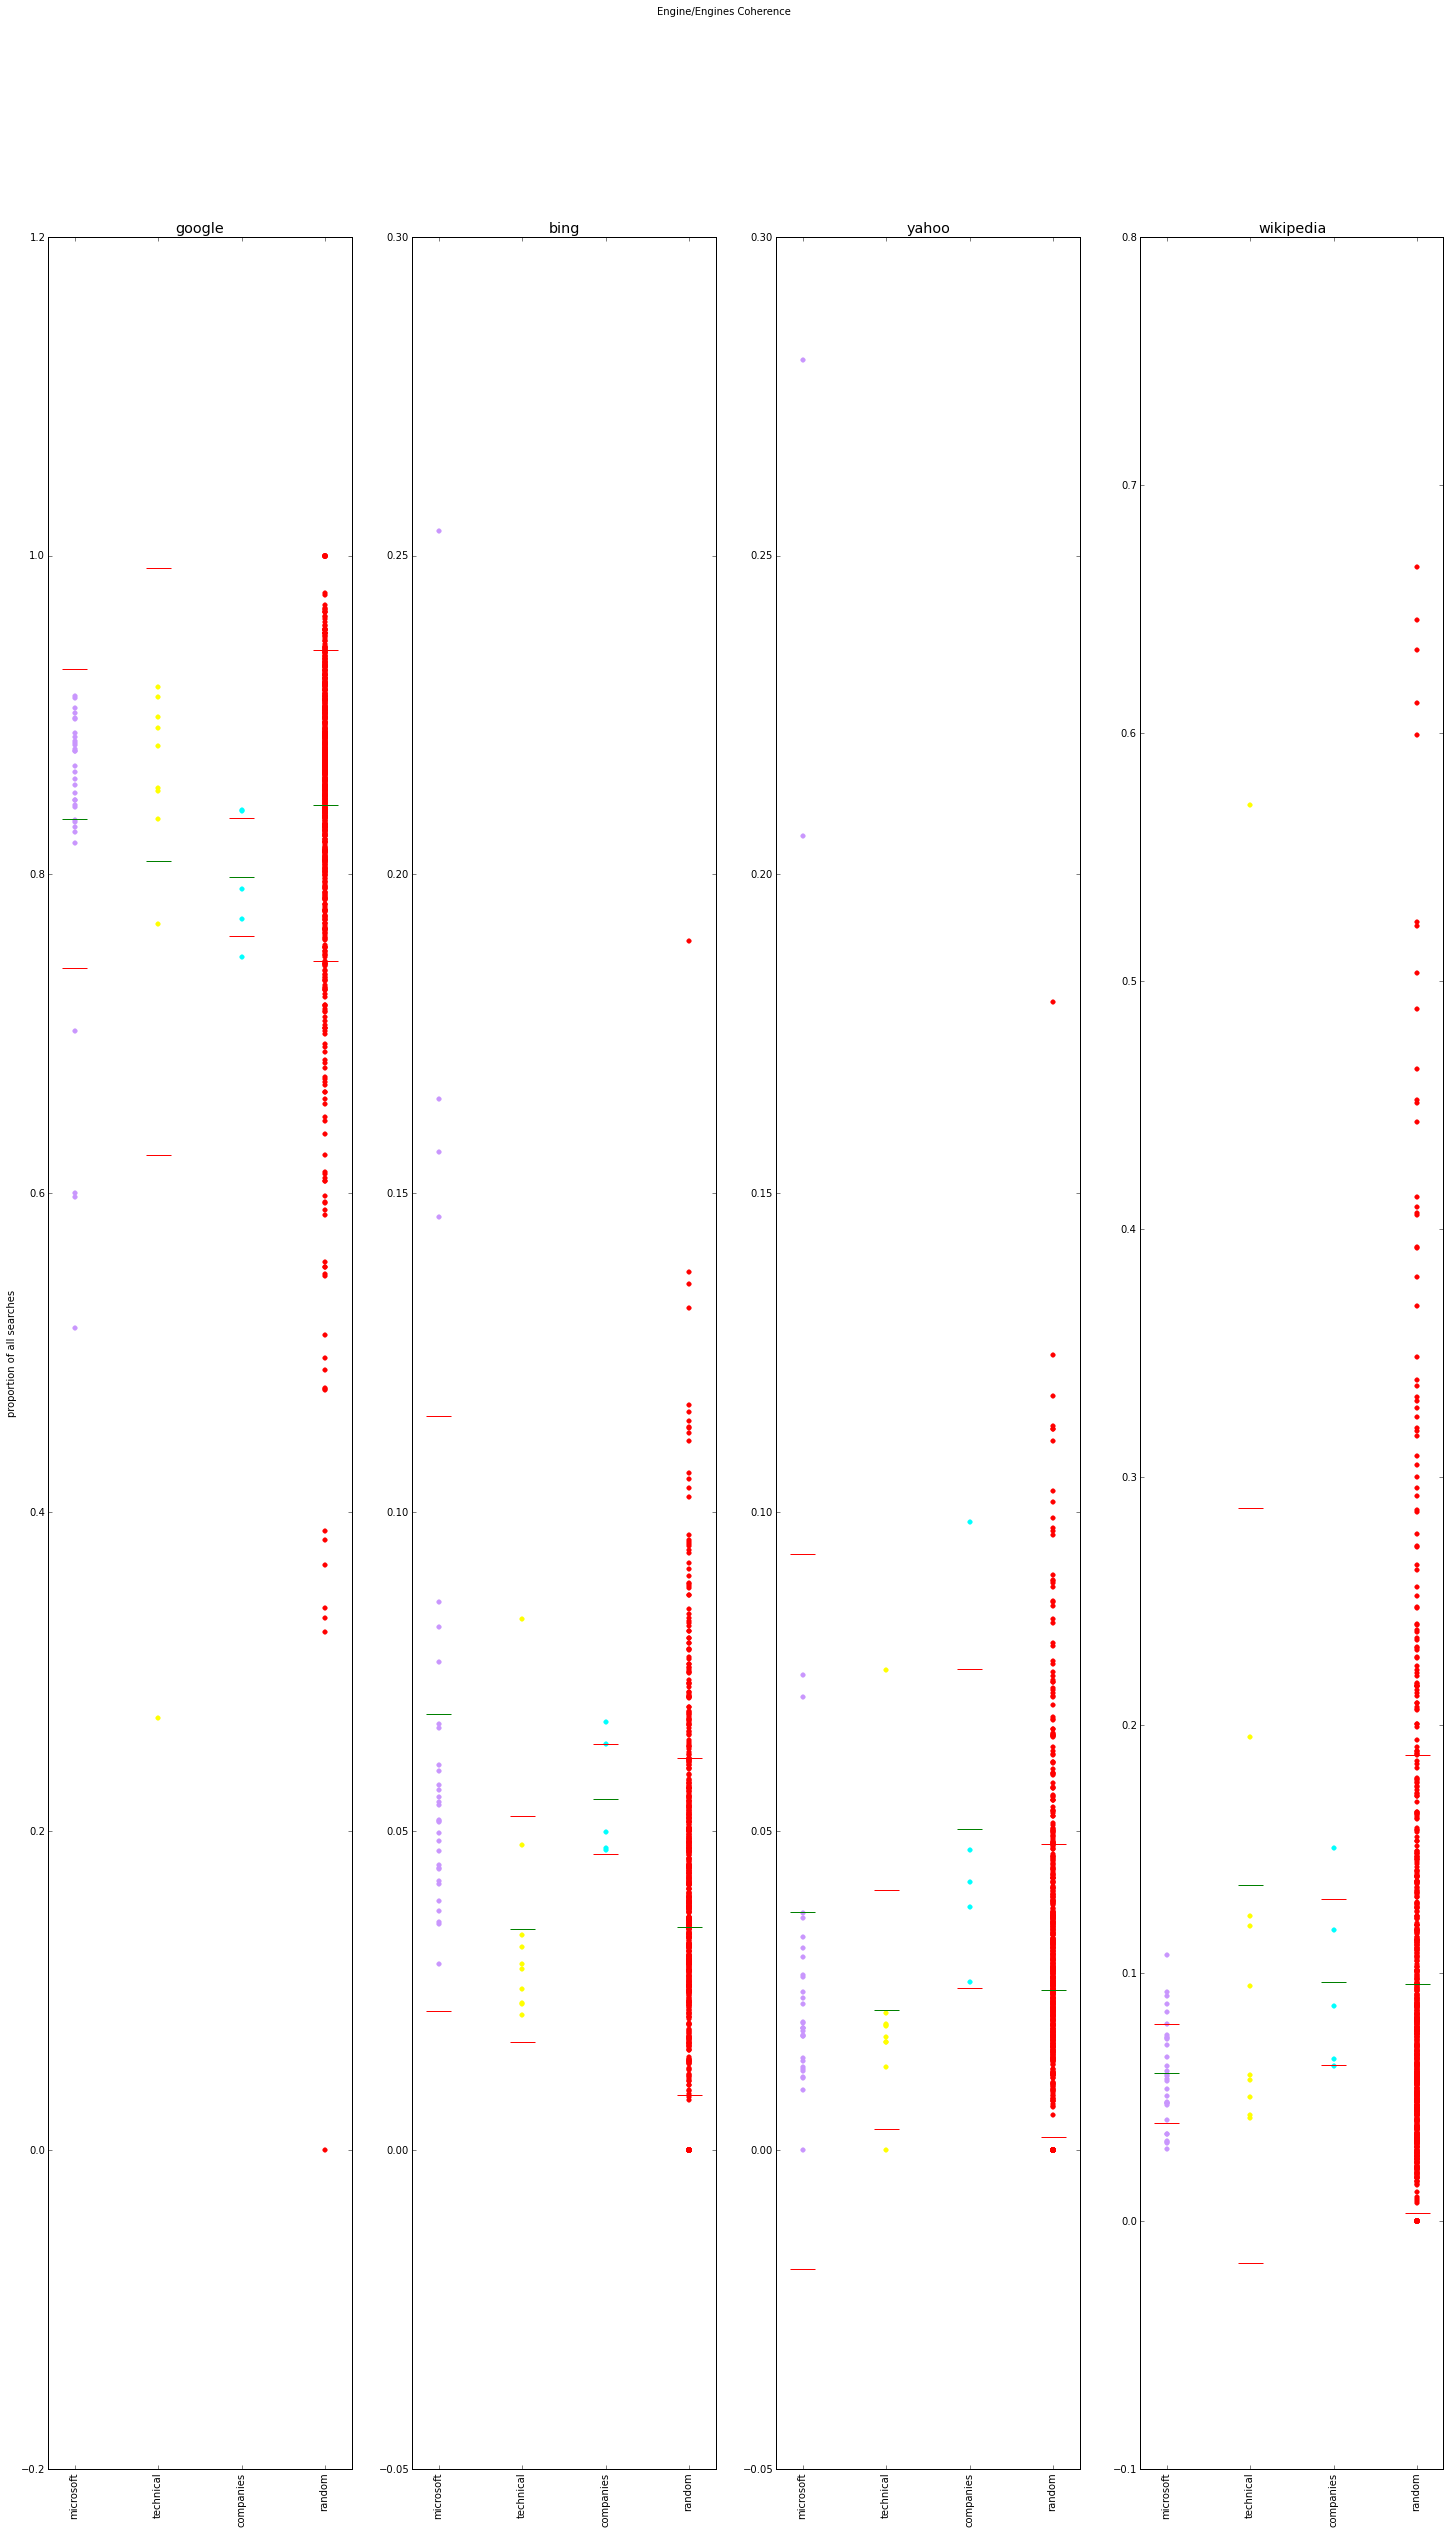

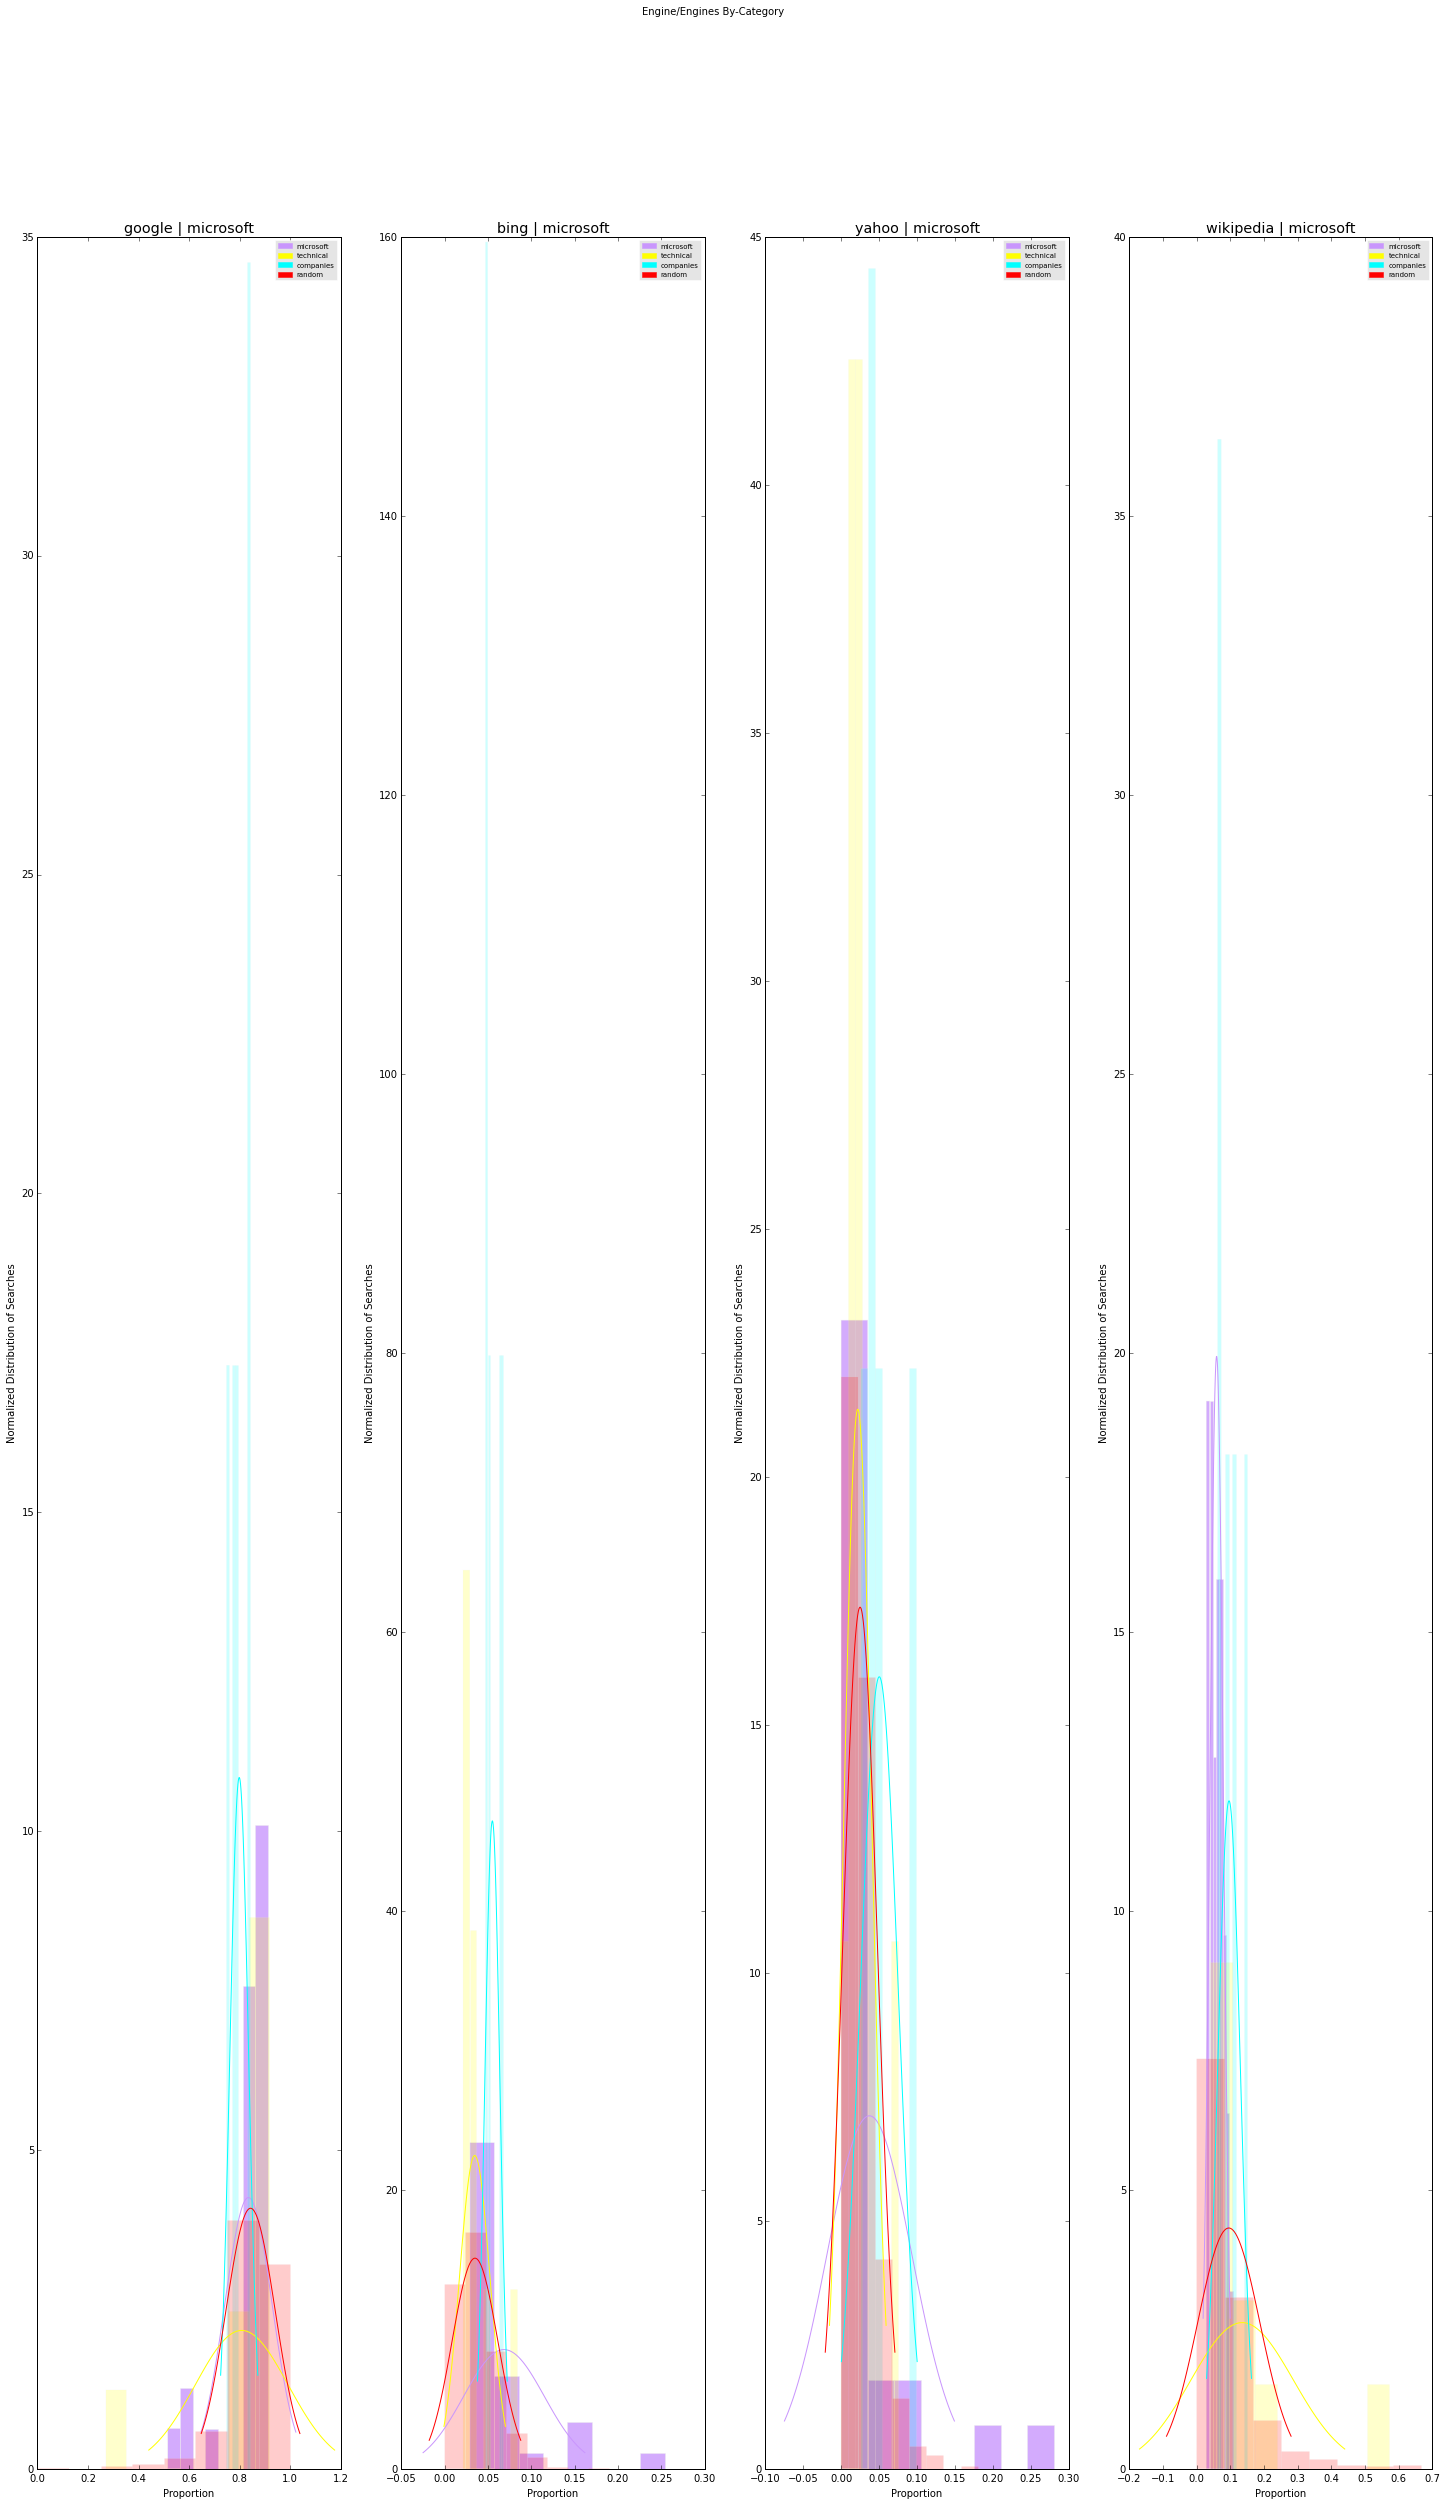

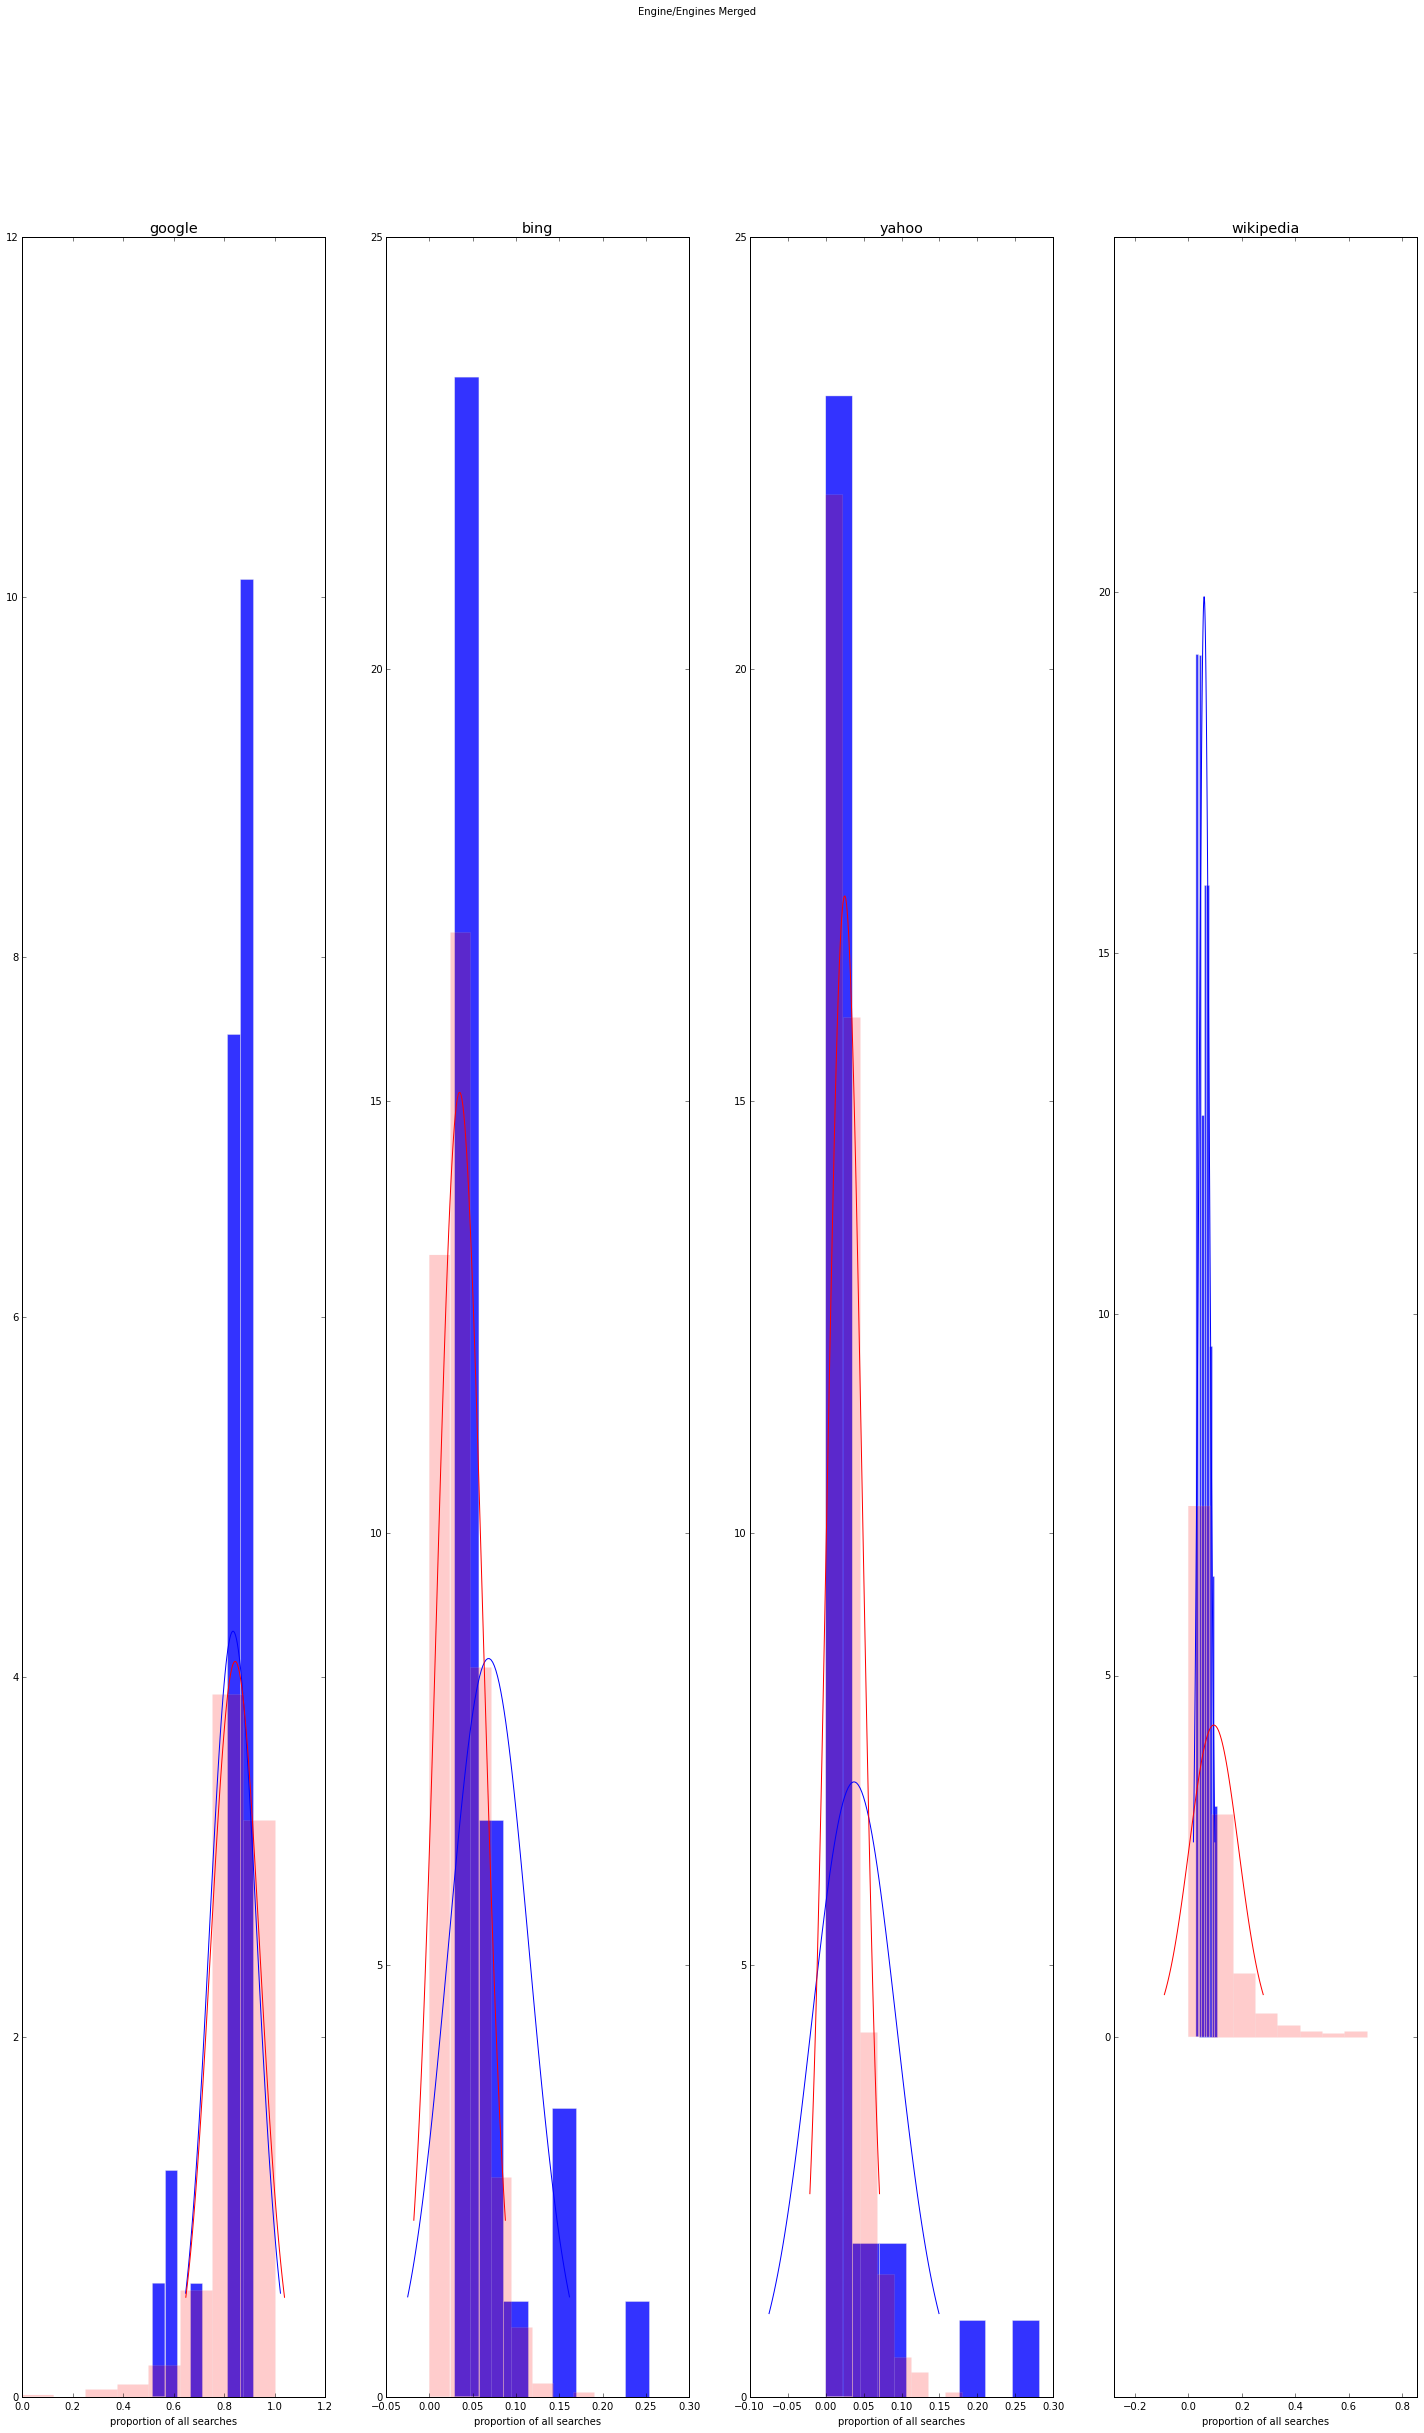

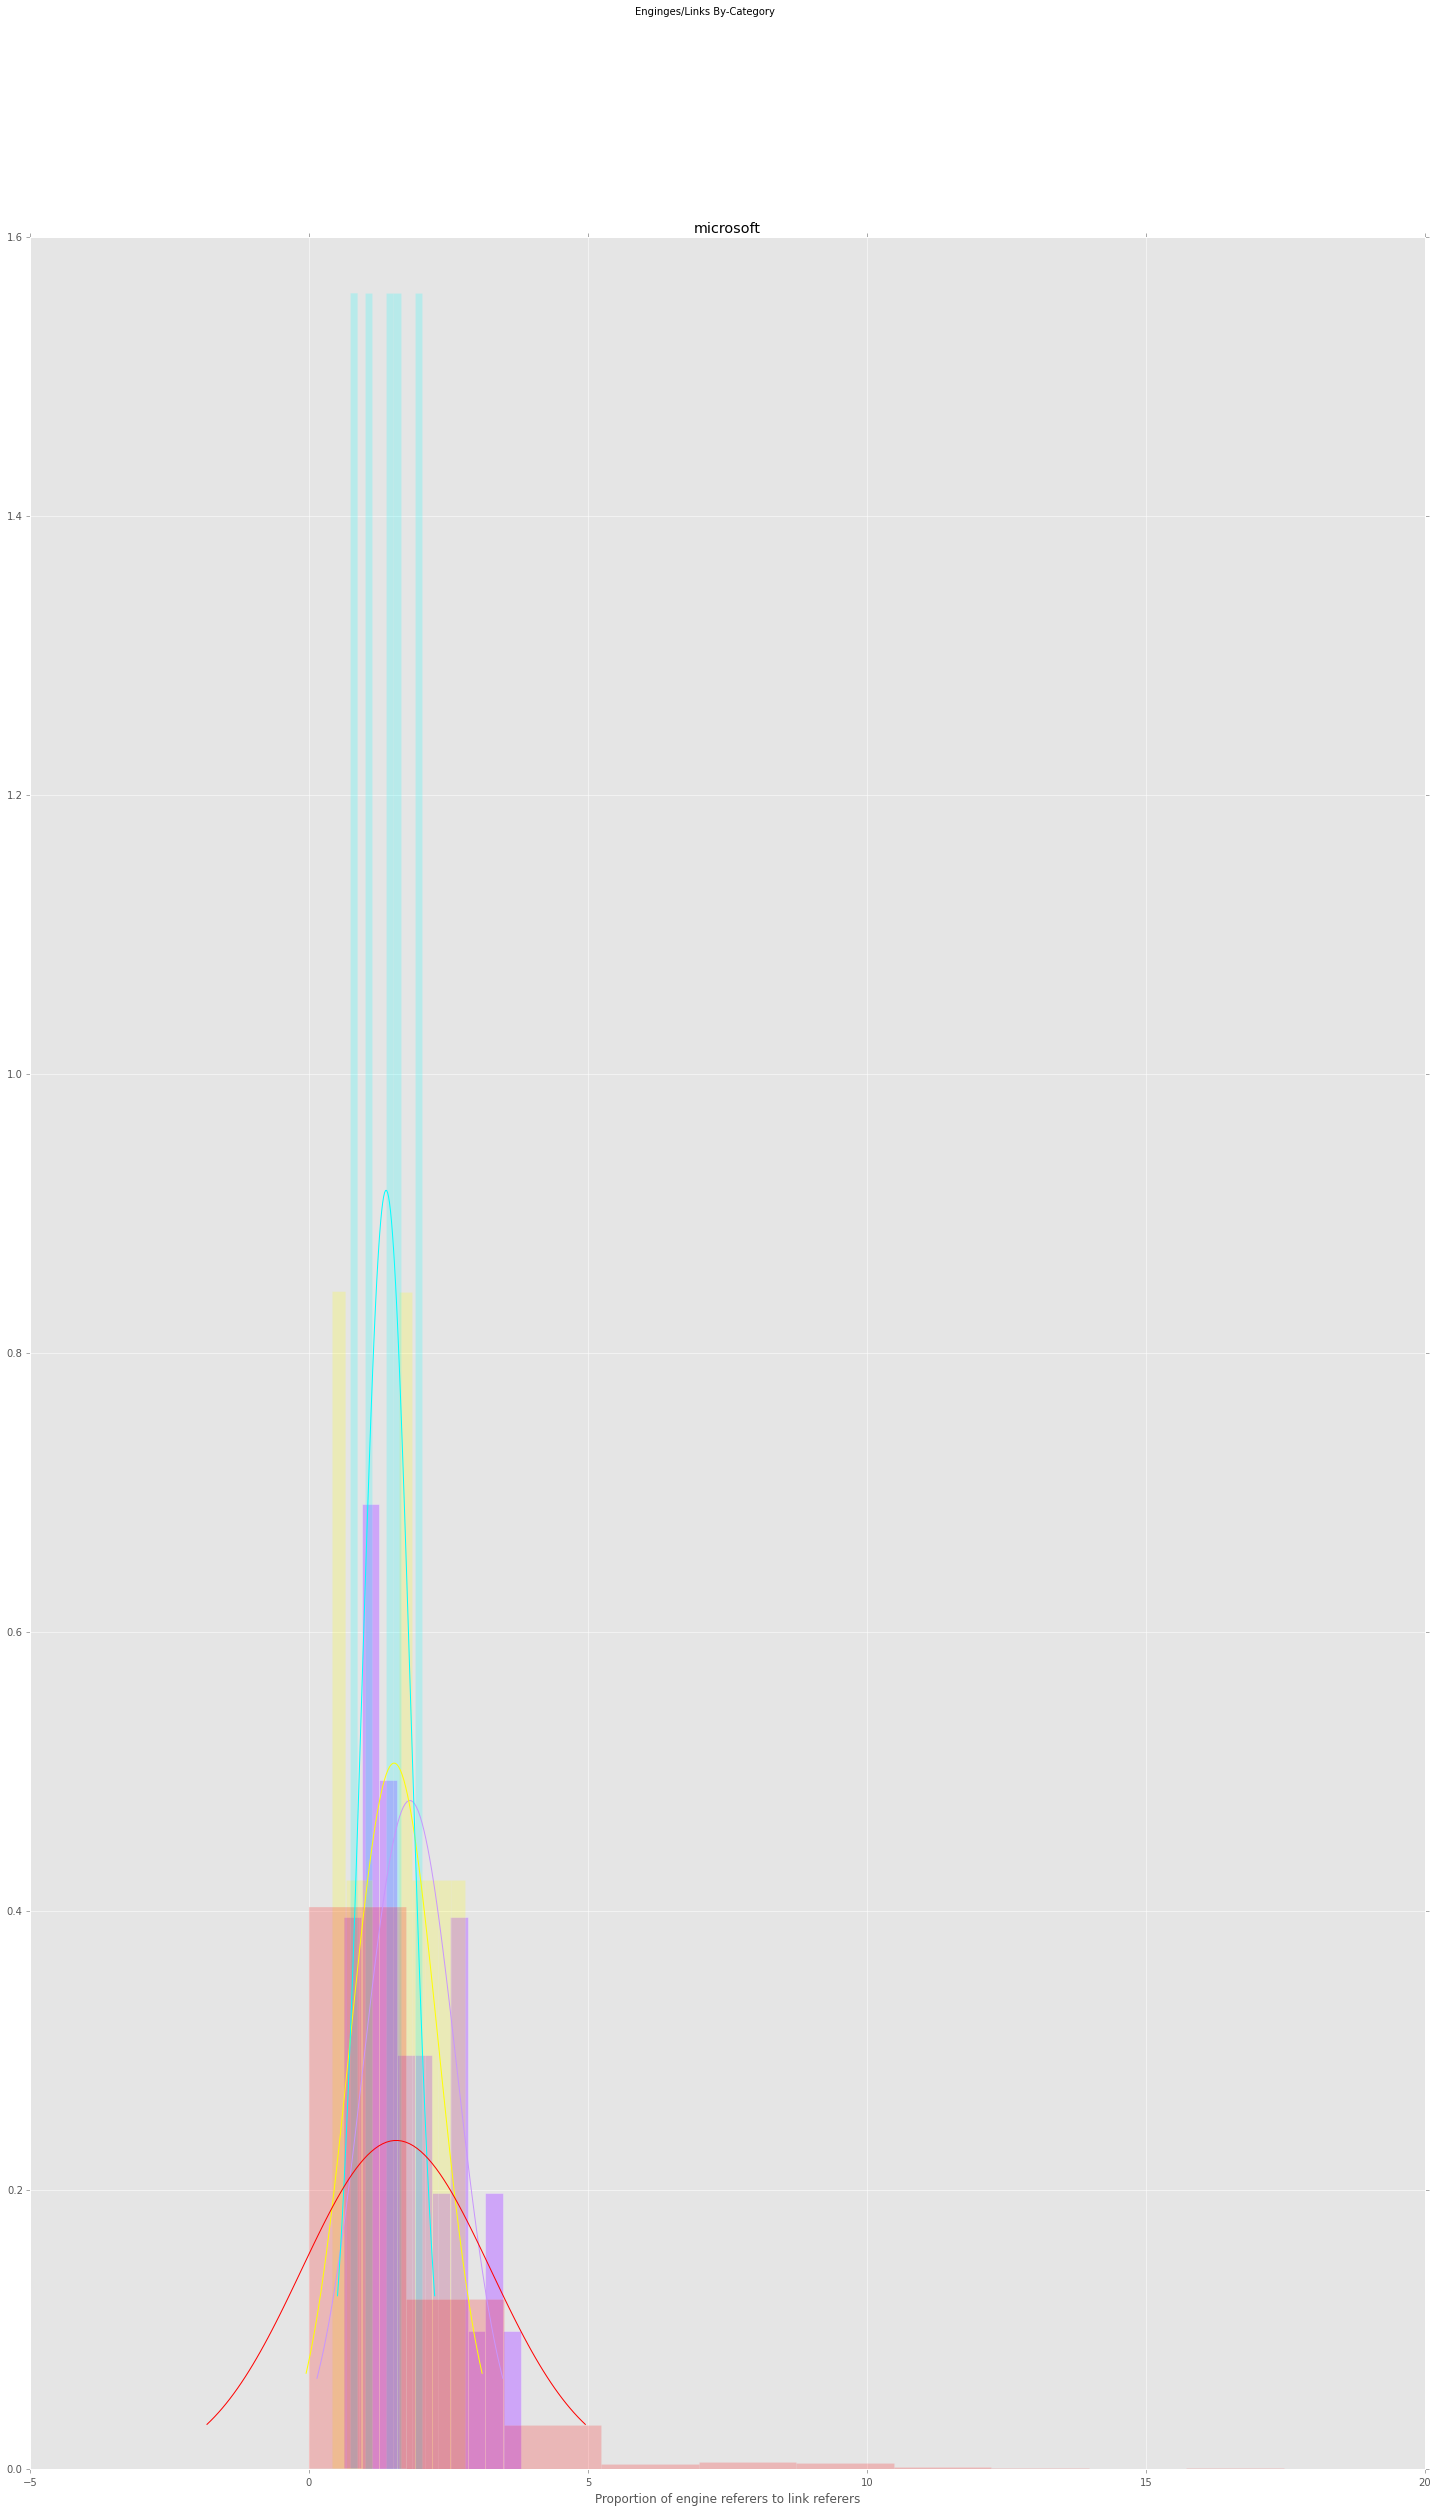

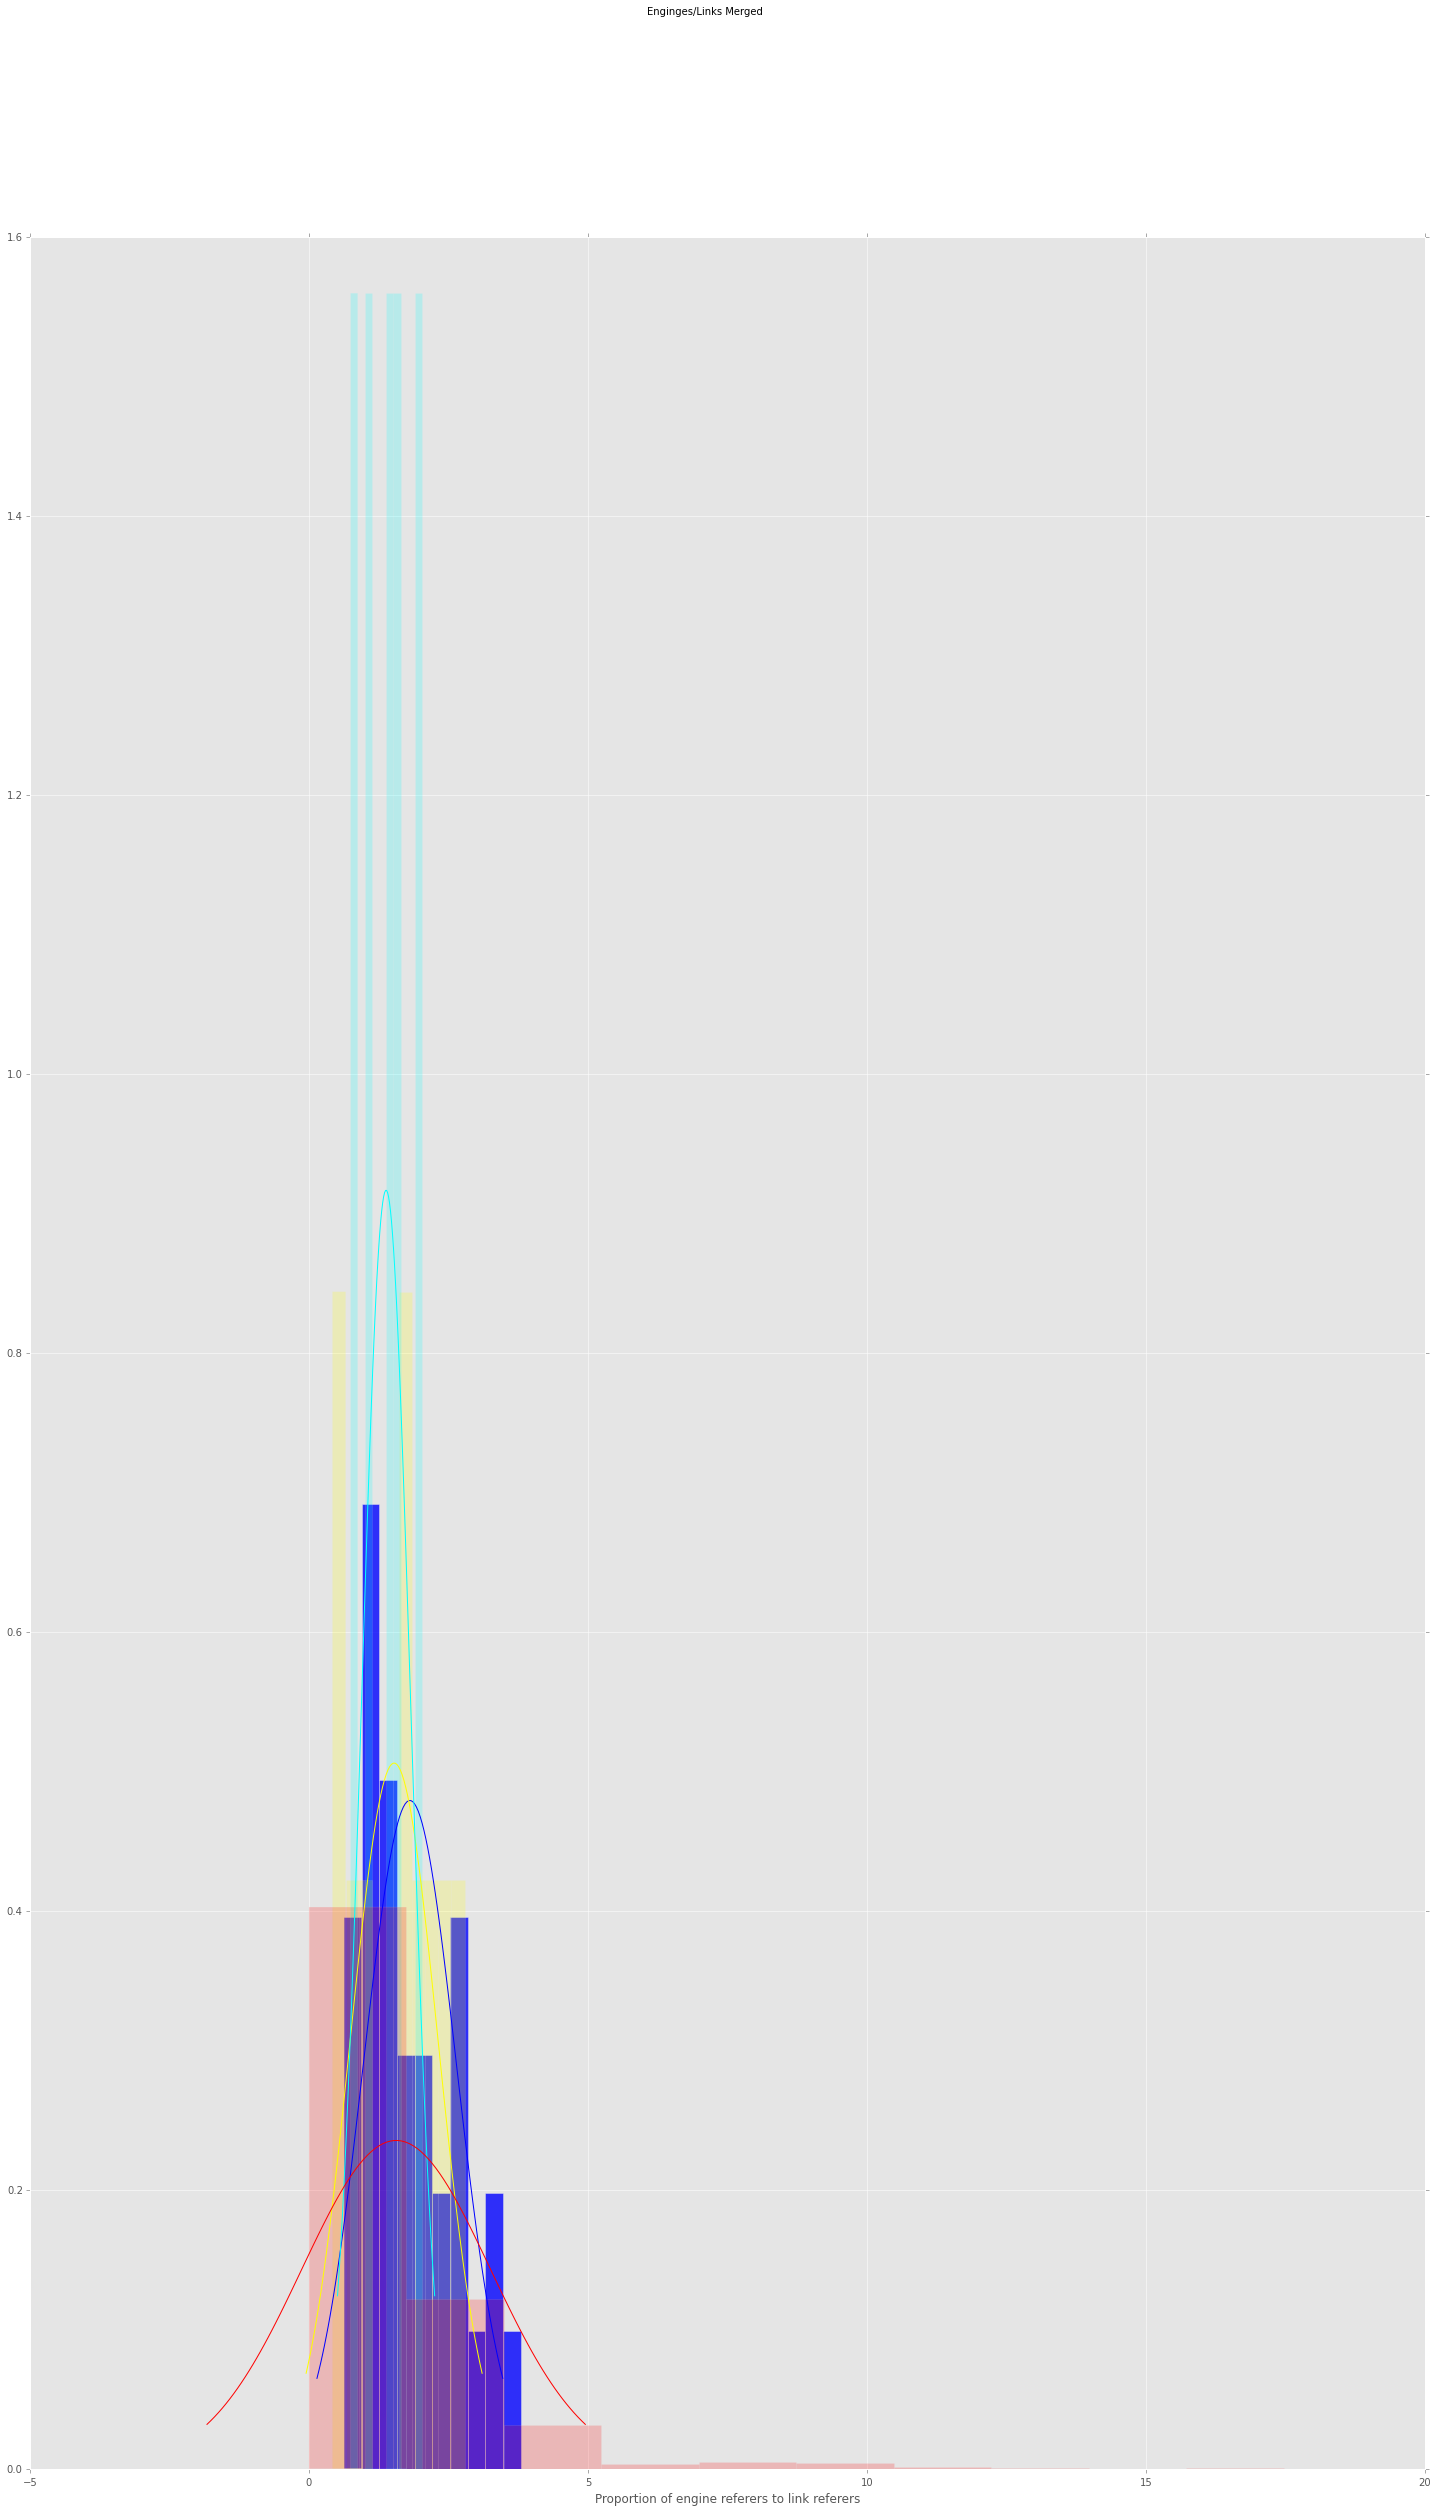

In [3]:
import instances.ms
ms_problem = WikiProblem(instances.ms.inst)
ms_problem.plot()

Preparing problem instance.
determinism does not exist
paternalism does not exist
democracy does not exist
alamo does not exist
Columbia Exhibit does not exist
stanley cup does not exist
world series does not exist
Jerry Seinfeld does not exist
Assata Shakur does not exist
Bayard Rustin does not exist
Roman Pulaski does not exist
Pablo Escobar does not exist
George Washington does not exist
Thomas Jefferson does not exist
Gabriel Garcia Marquez does not exist
David Foster Wallace does not exist
Chinua Achebe does not exist
David Lynch does not exist
Alexander The Great. does not exist
Jorge Louis Borges does not exist
Barak Obama does not exist
J.K Rowling does not exist
Tupac Shakur does not exist
Marvin Misky does not exist
John Legend does not exist
Ben Franklin does not exist
Mao ZeDong does not exist
Martin Luther King does not exist
Hillary Clinton does not exist
David Hockney does not exist
Muhammed Ali does not exist
Sylvia Plath does not exist
Steven Pinker does not exist
Fill

/Users/shalom/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


ValueError: x must have at least one data point

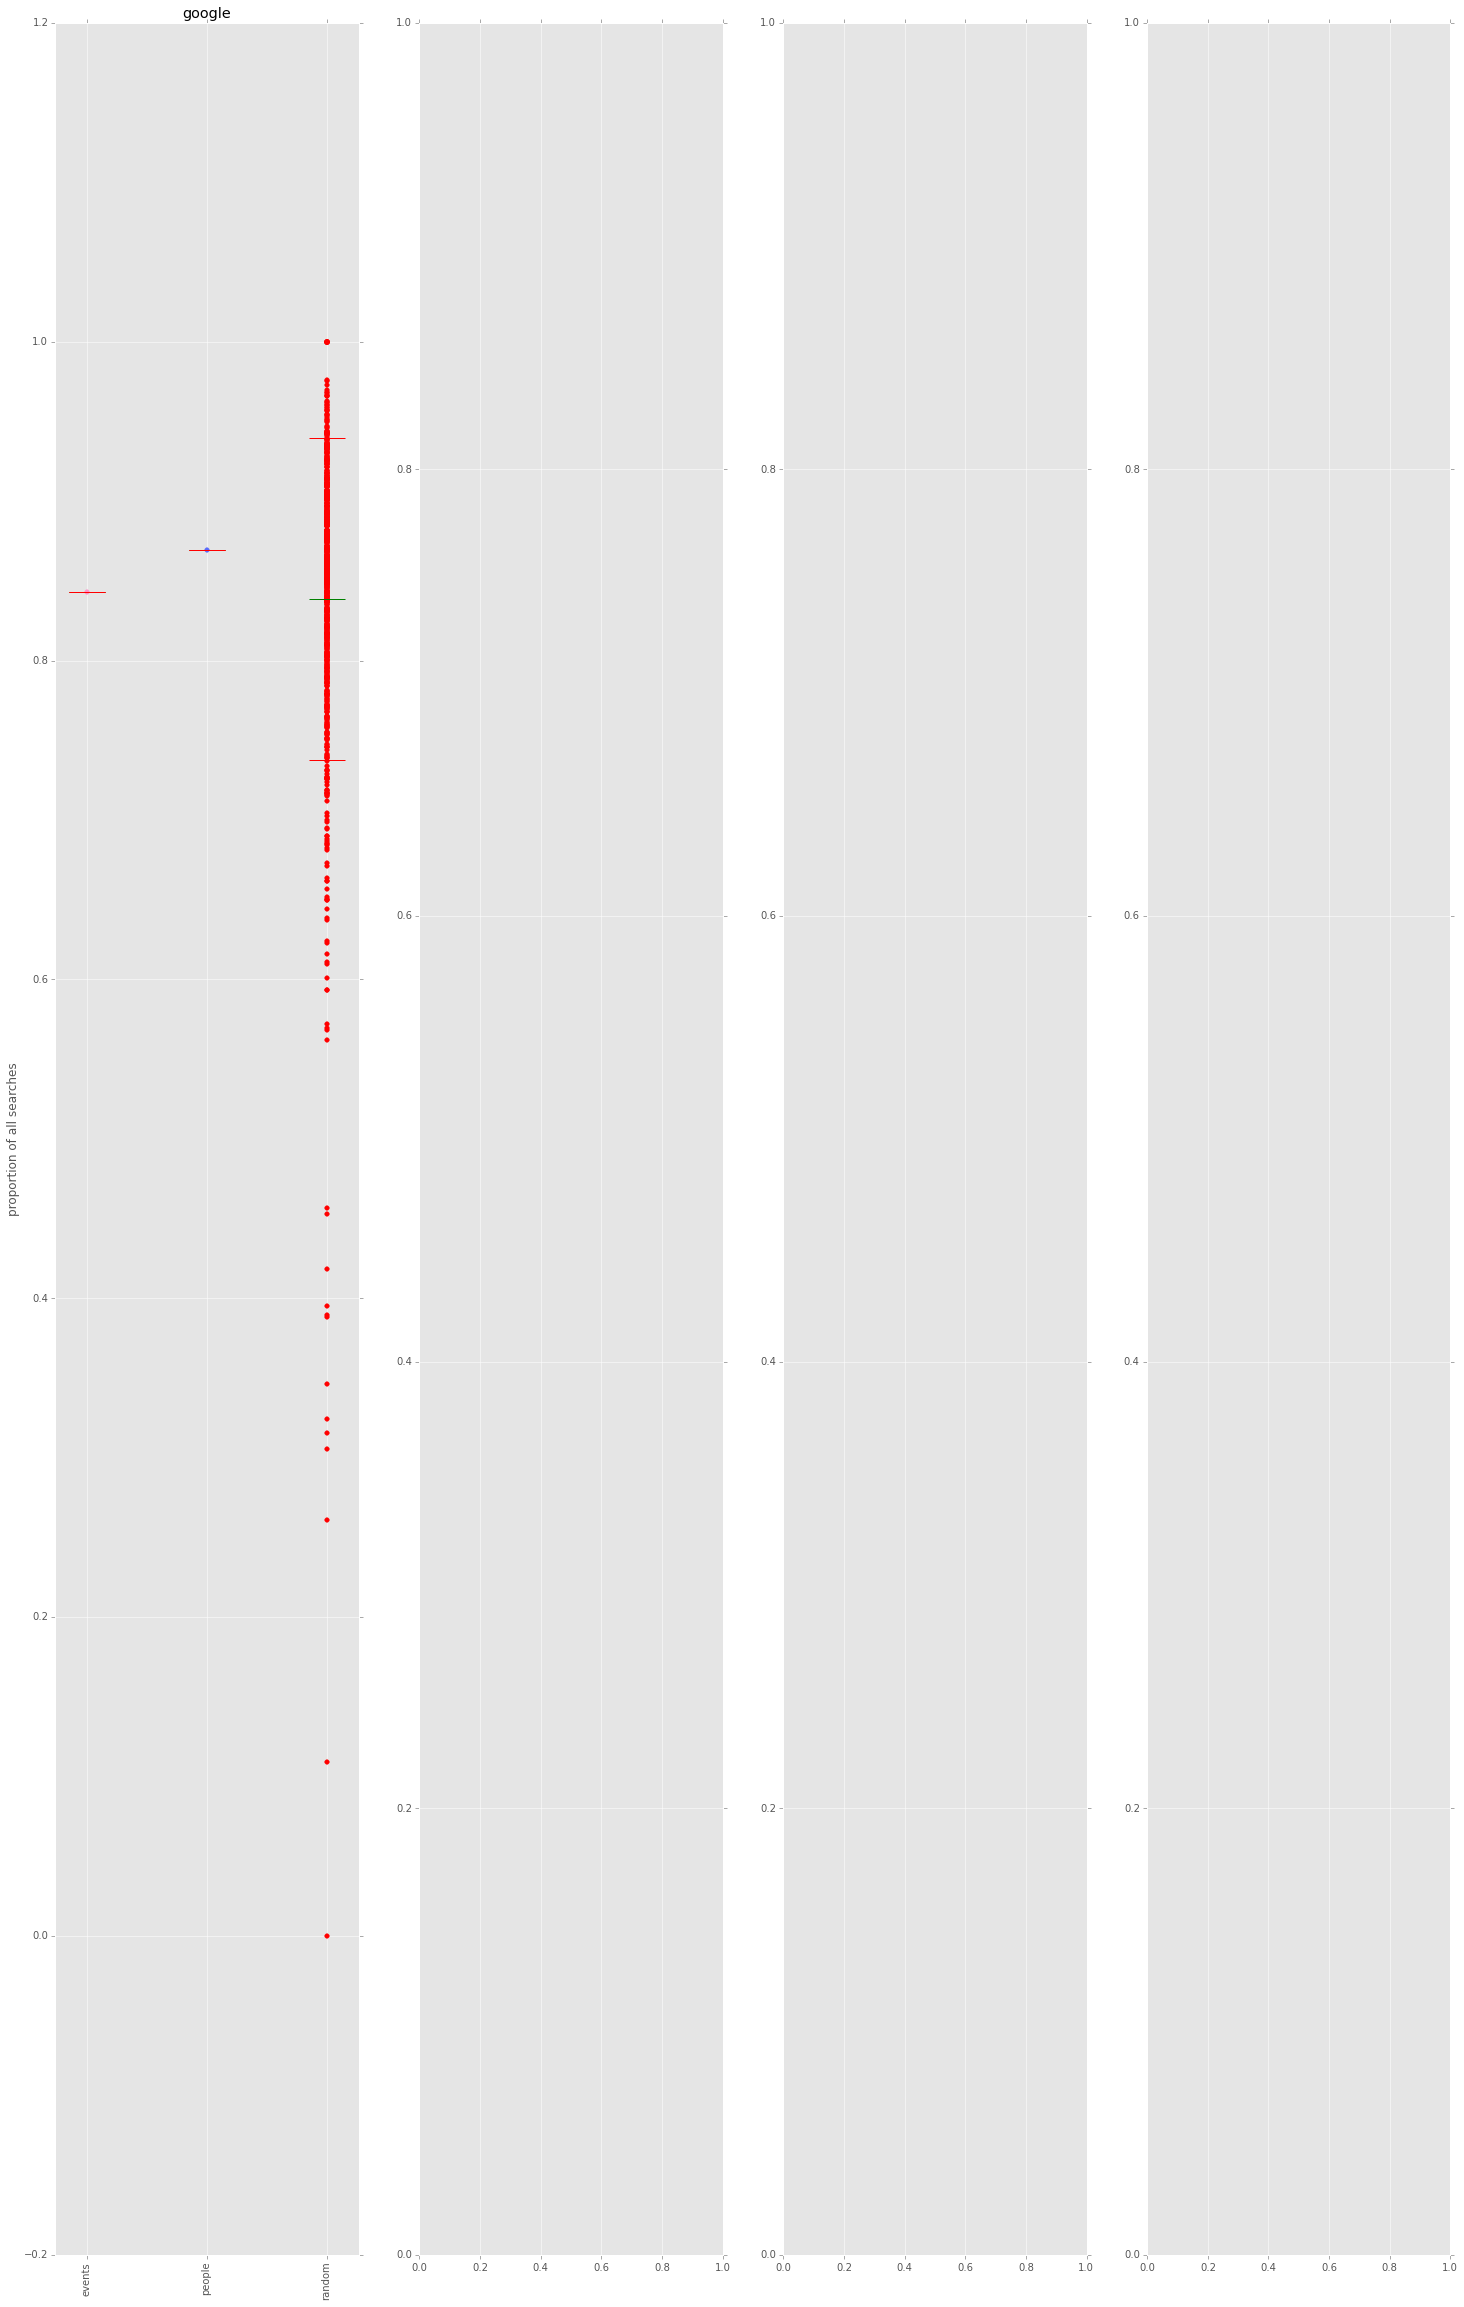

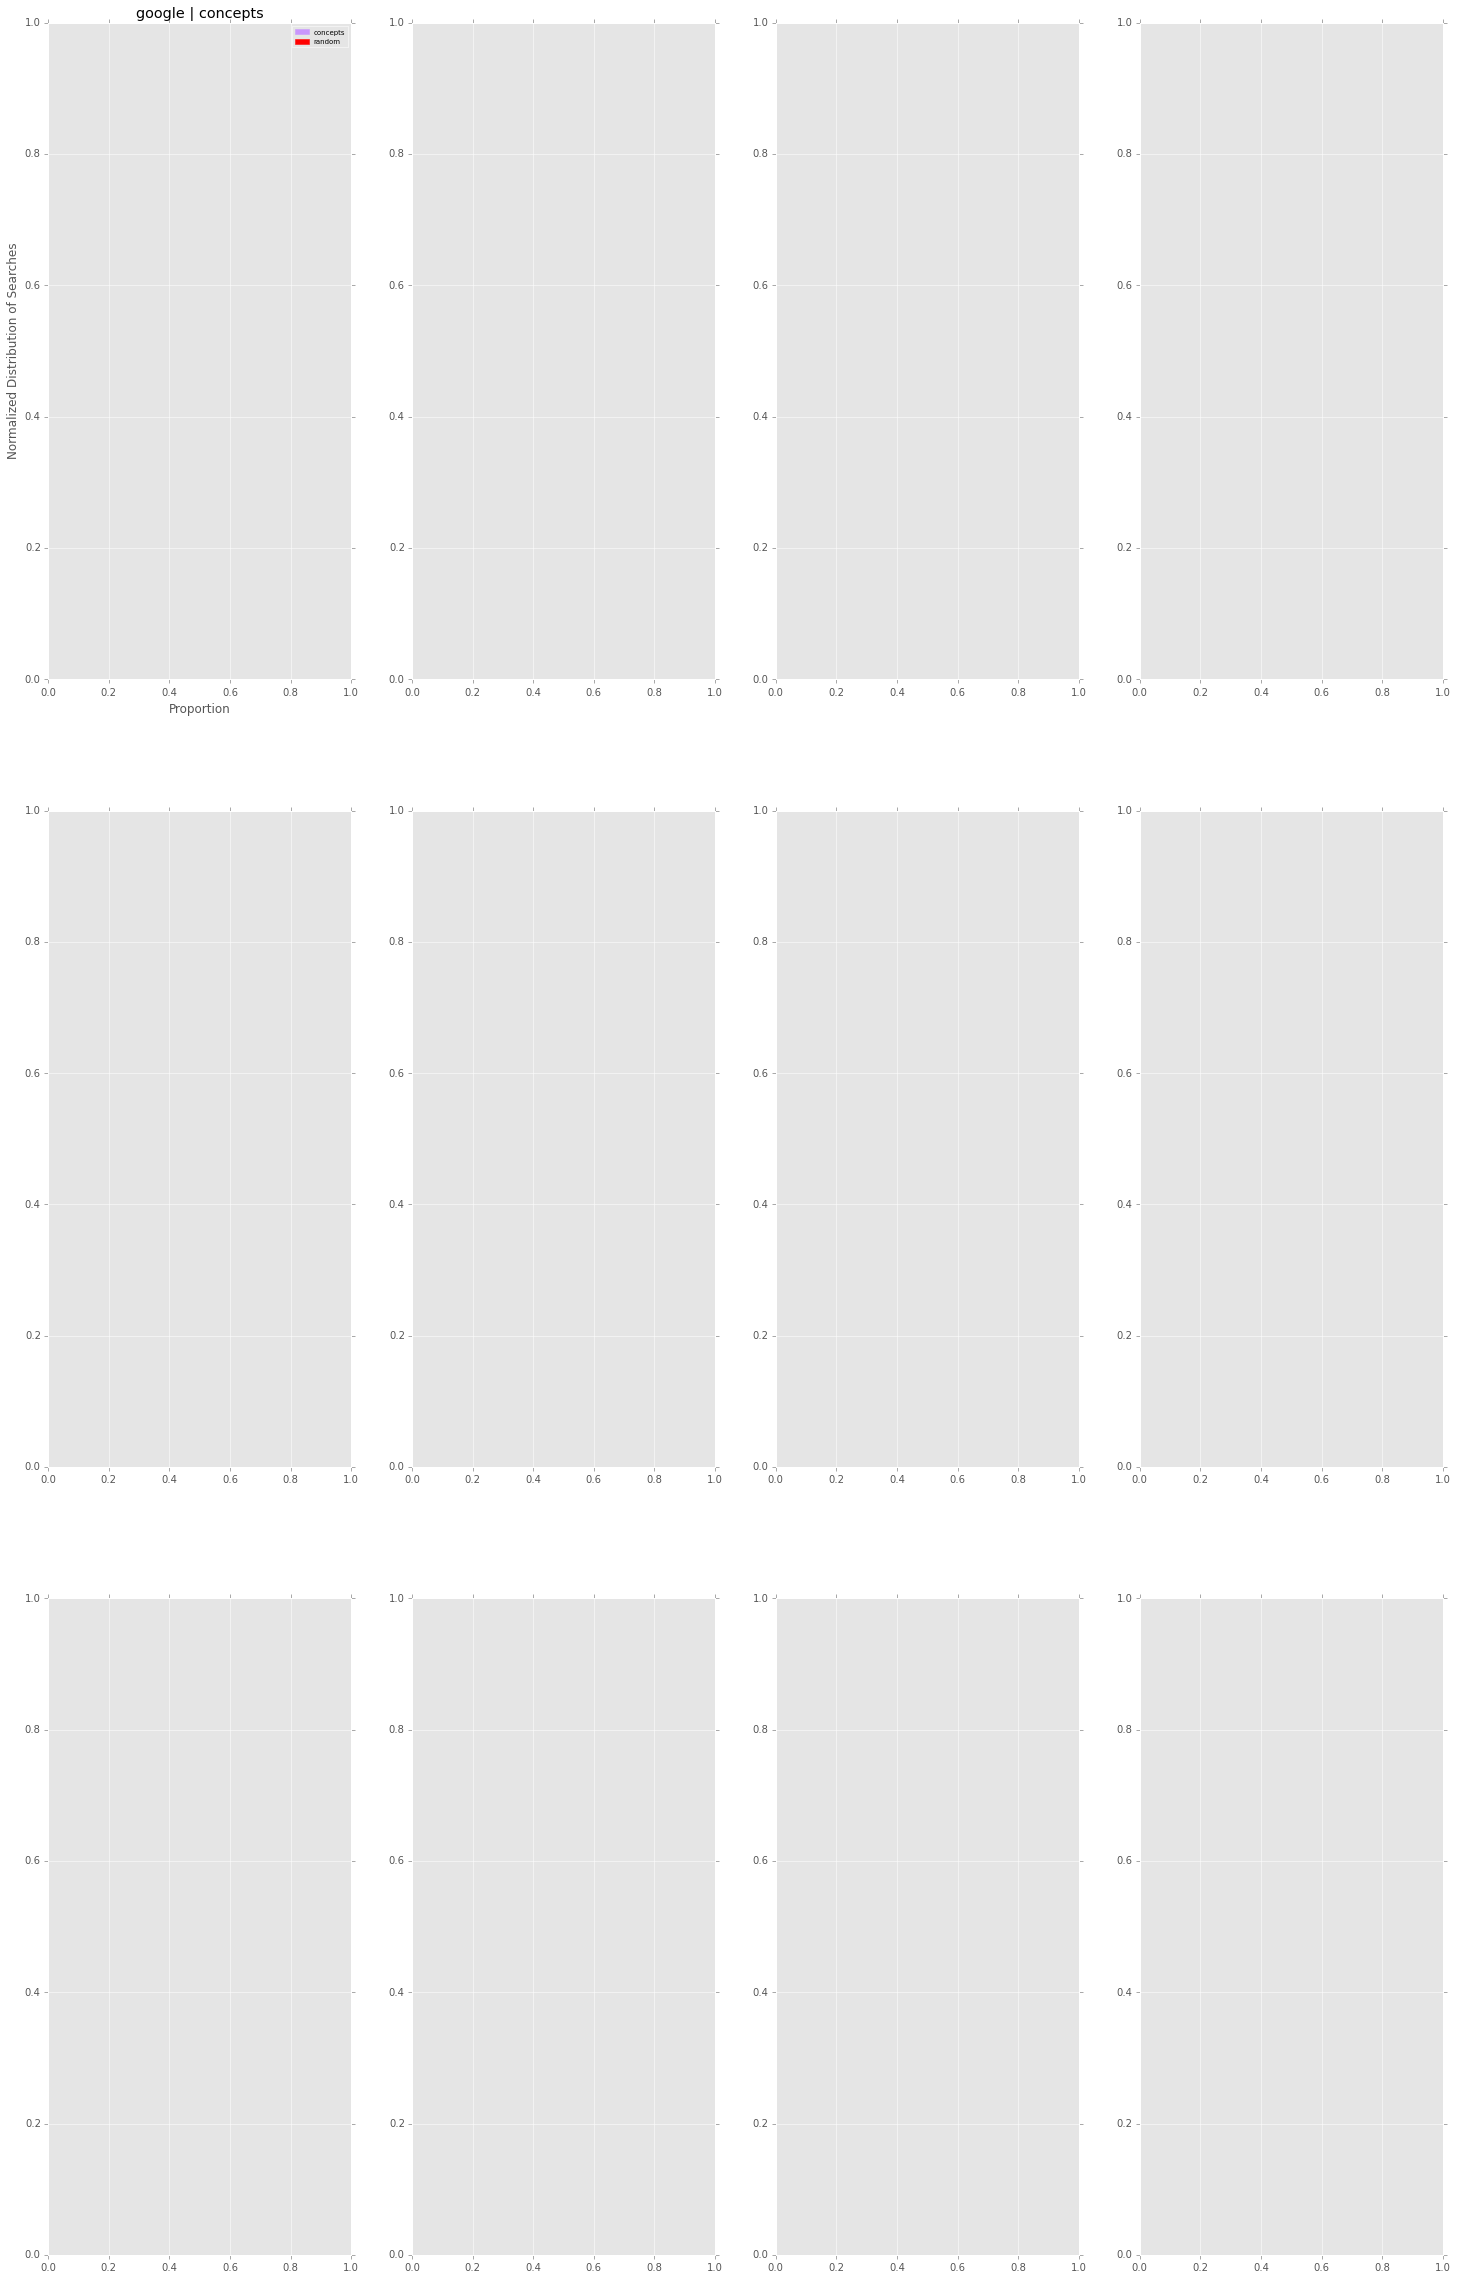

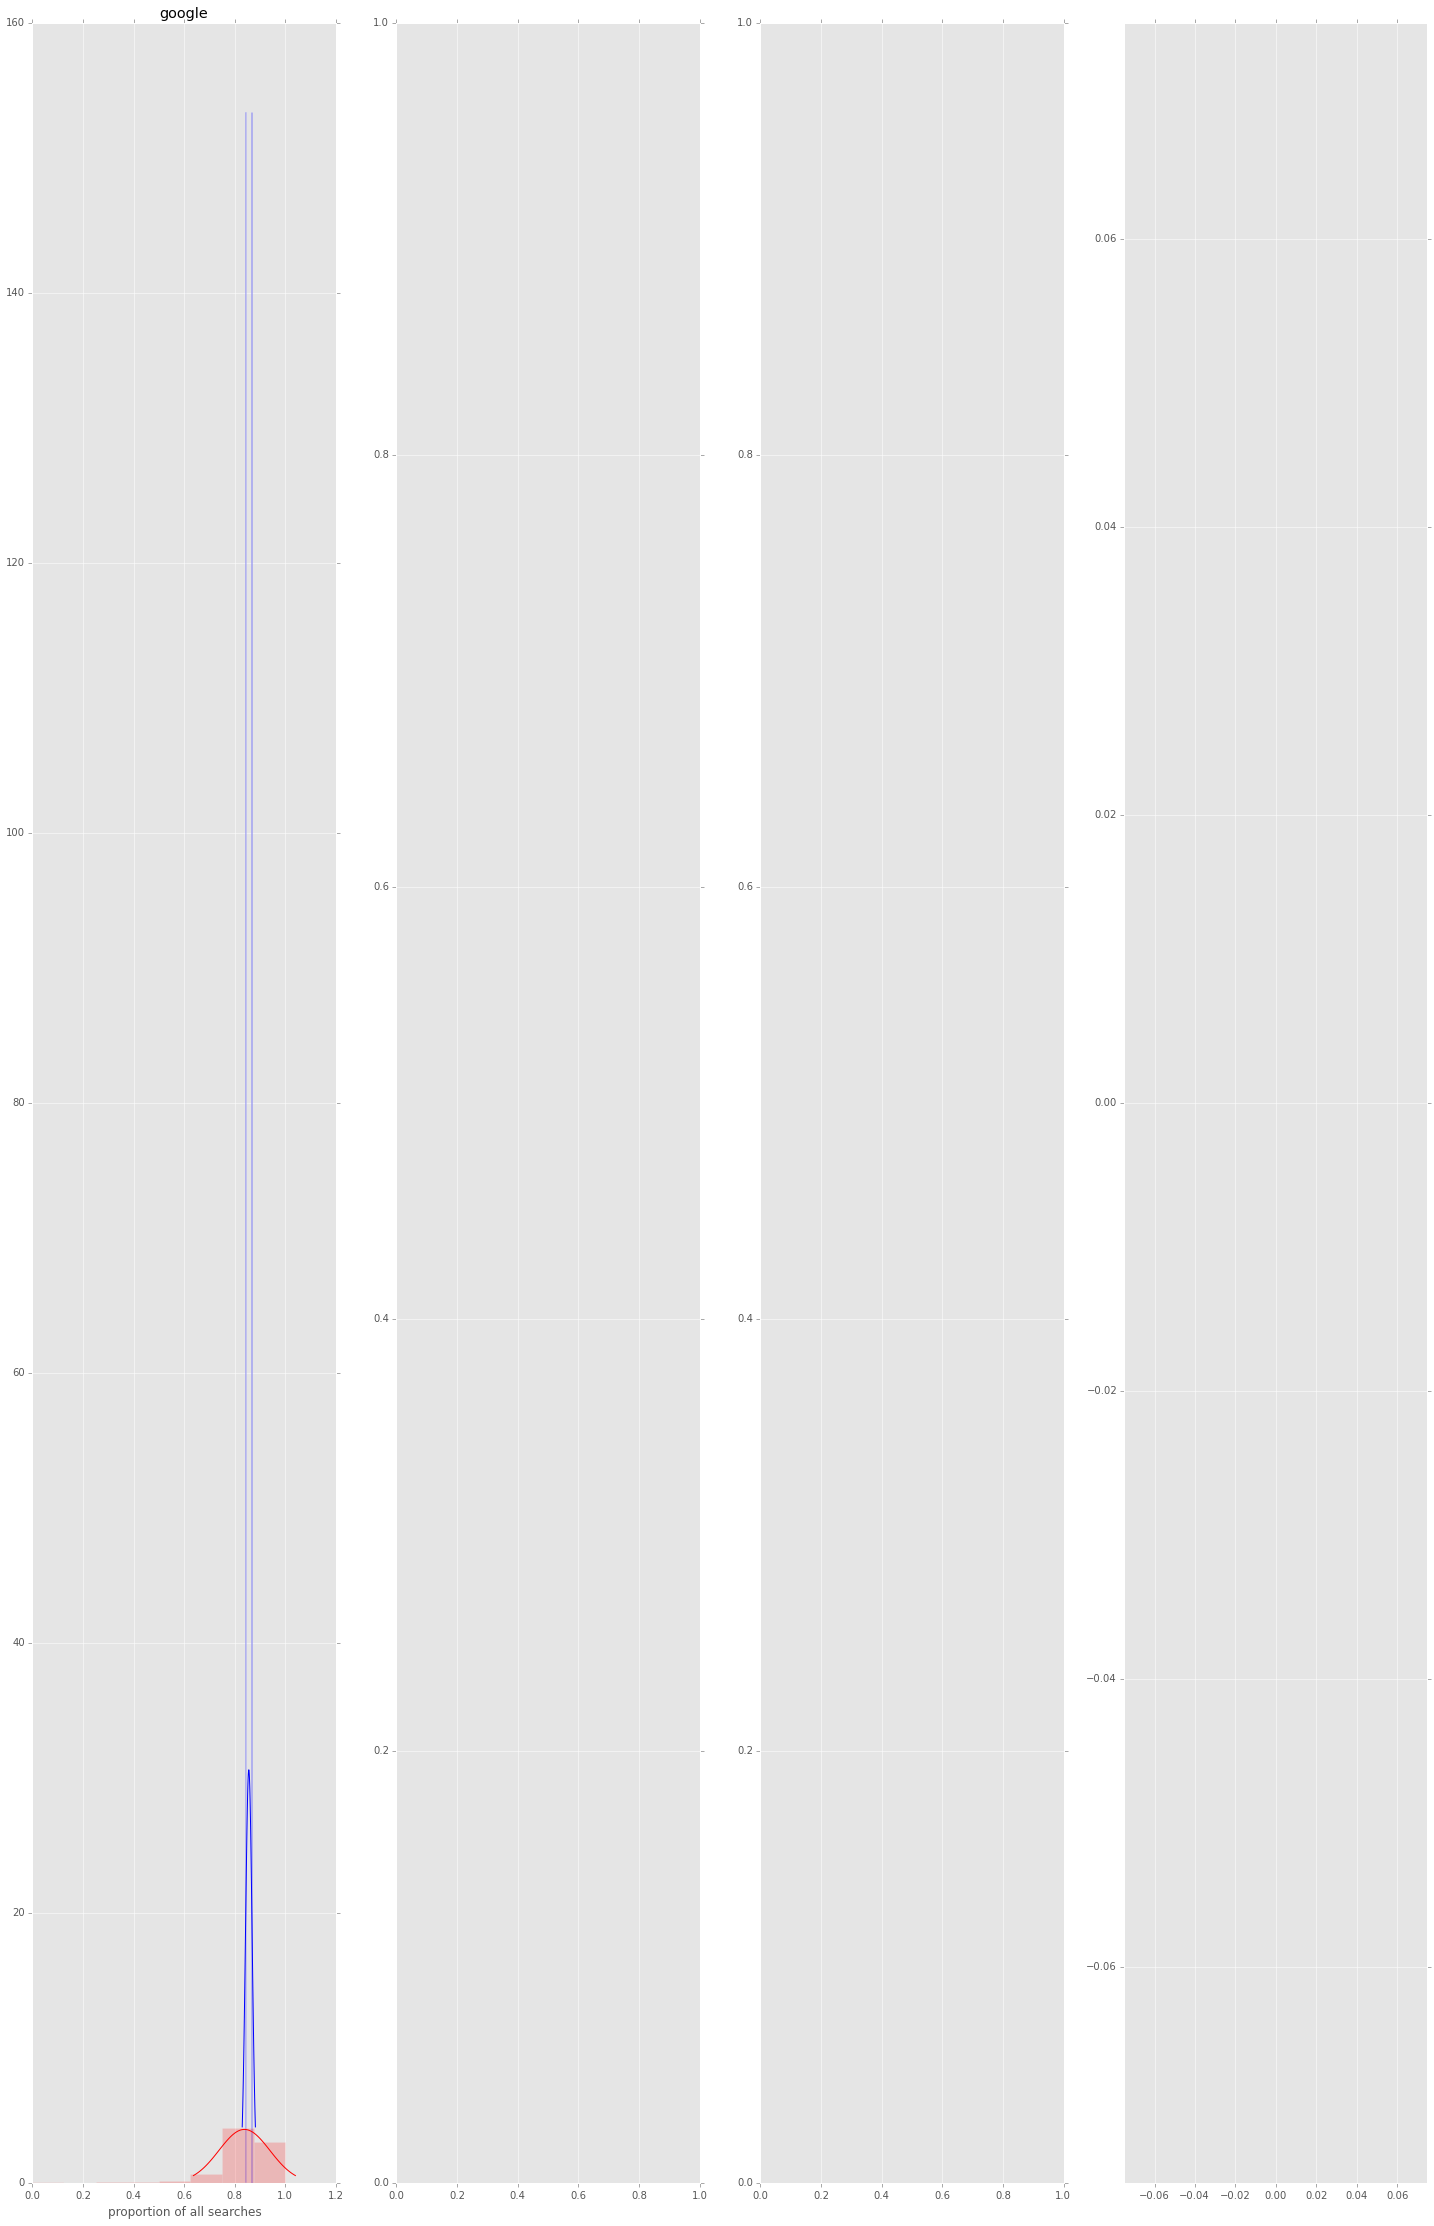

In [4]:
import instances.nountype
nountype_problem = WikiProblem(instances.nountype.inst)
nountype_problem.plot()

Preparing problem instance.
LSD does not exist
Marijuana does not exist
Viagra does not exist
Xanex does not exist
Heroine does not exist
Gay_marriage does not exist
Pro-life does not exist
Arab-Israeli_conflict does not exist
Legalization_of_drugs does not exist
Sex_positions does not exist
homosexuality does not exist
Sexual_network does not exist
Mechanics_of_sex does not exist
Blow_job does not exist
Clitorus does not exist
cock does not exist
heterosexuality does not exist
Syphillis does not exist
Terrorist_attack does not exist
AIDS does not exist
Primary_structure does not exist
Filling tables with query results
Reducing the query tables.
Beginning the plotting process.


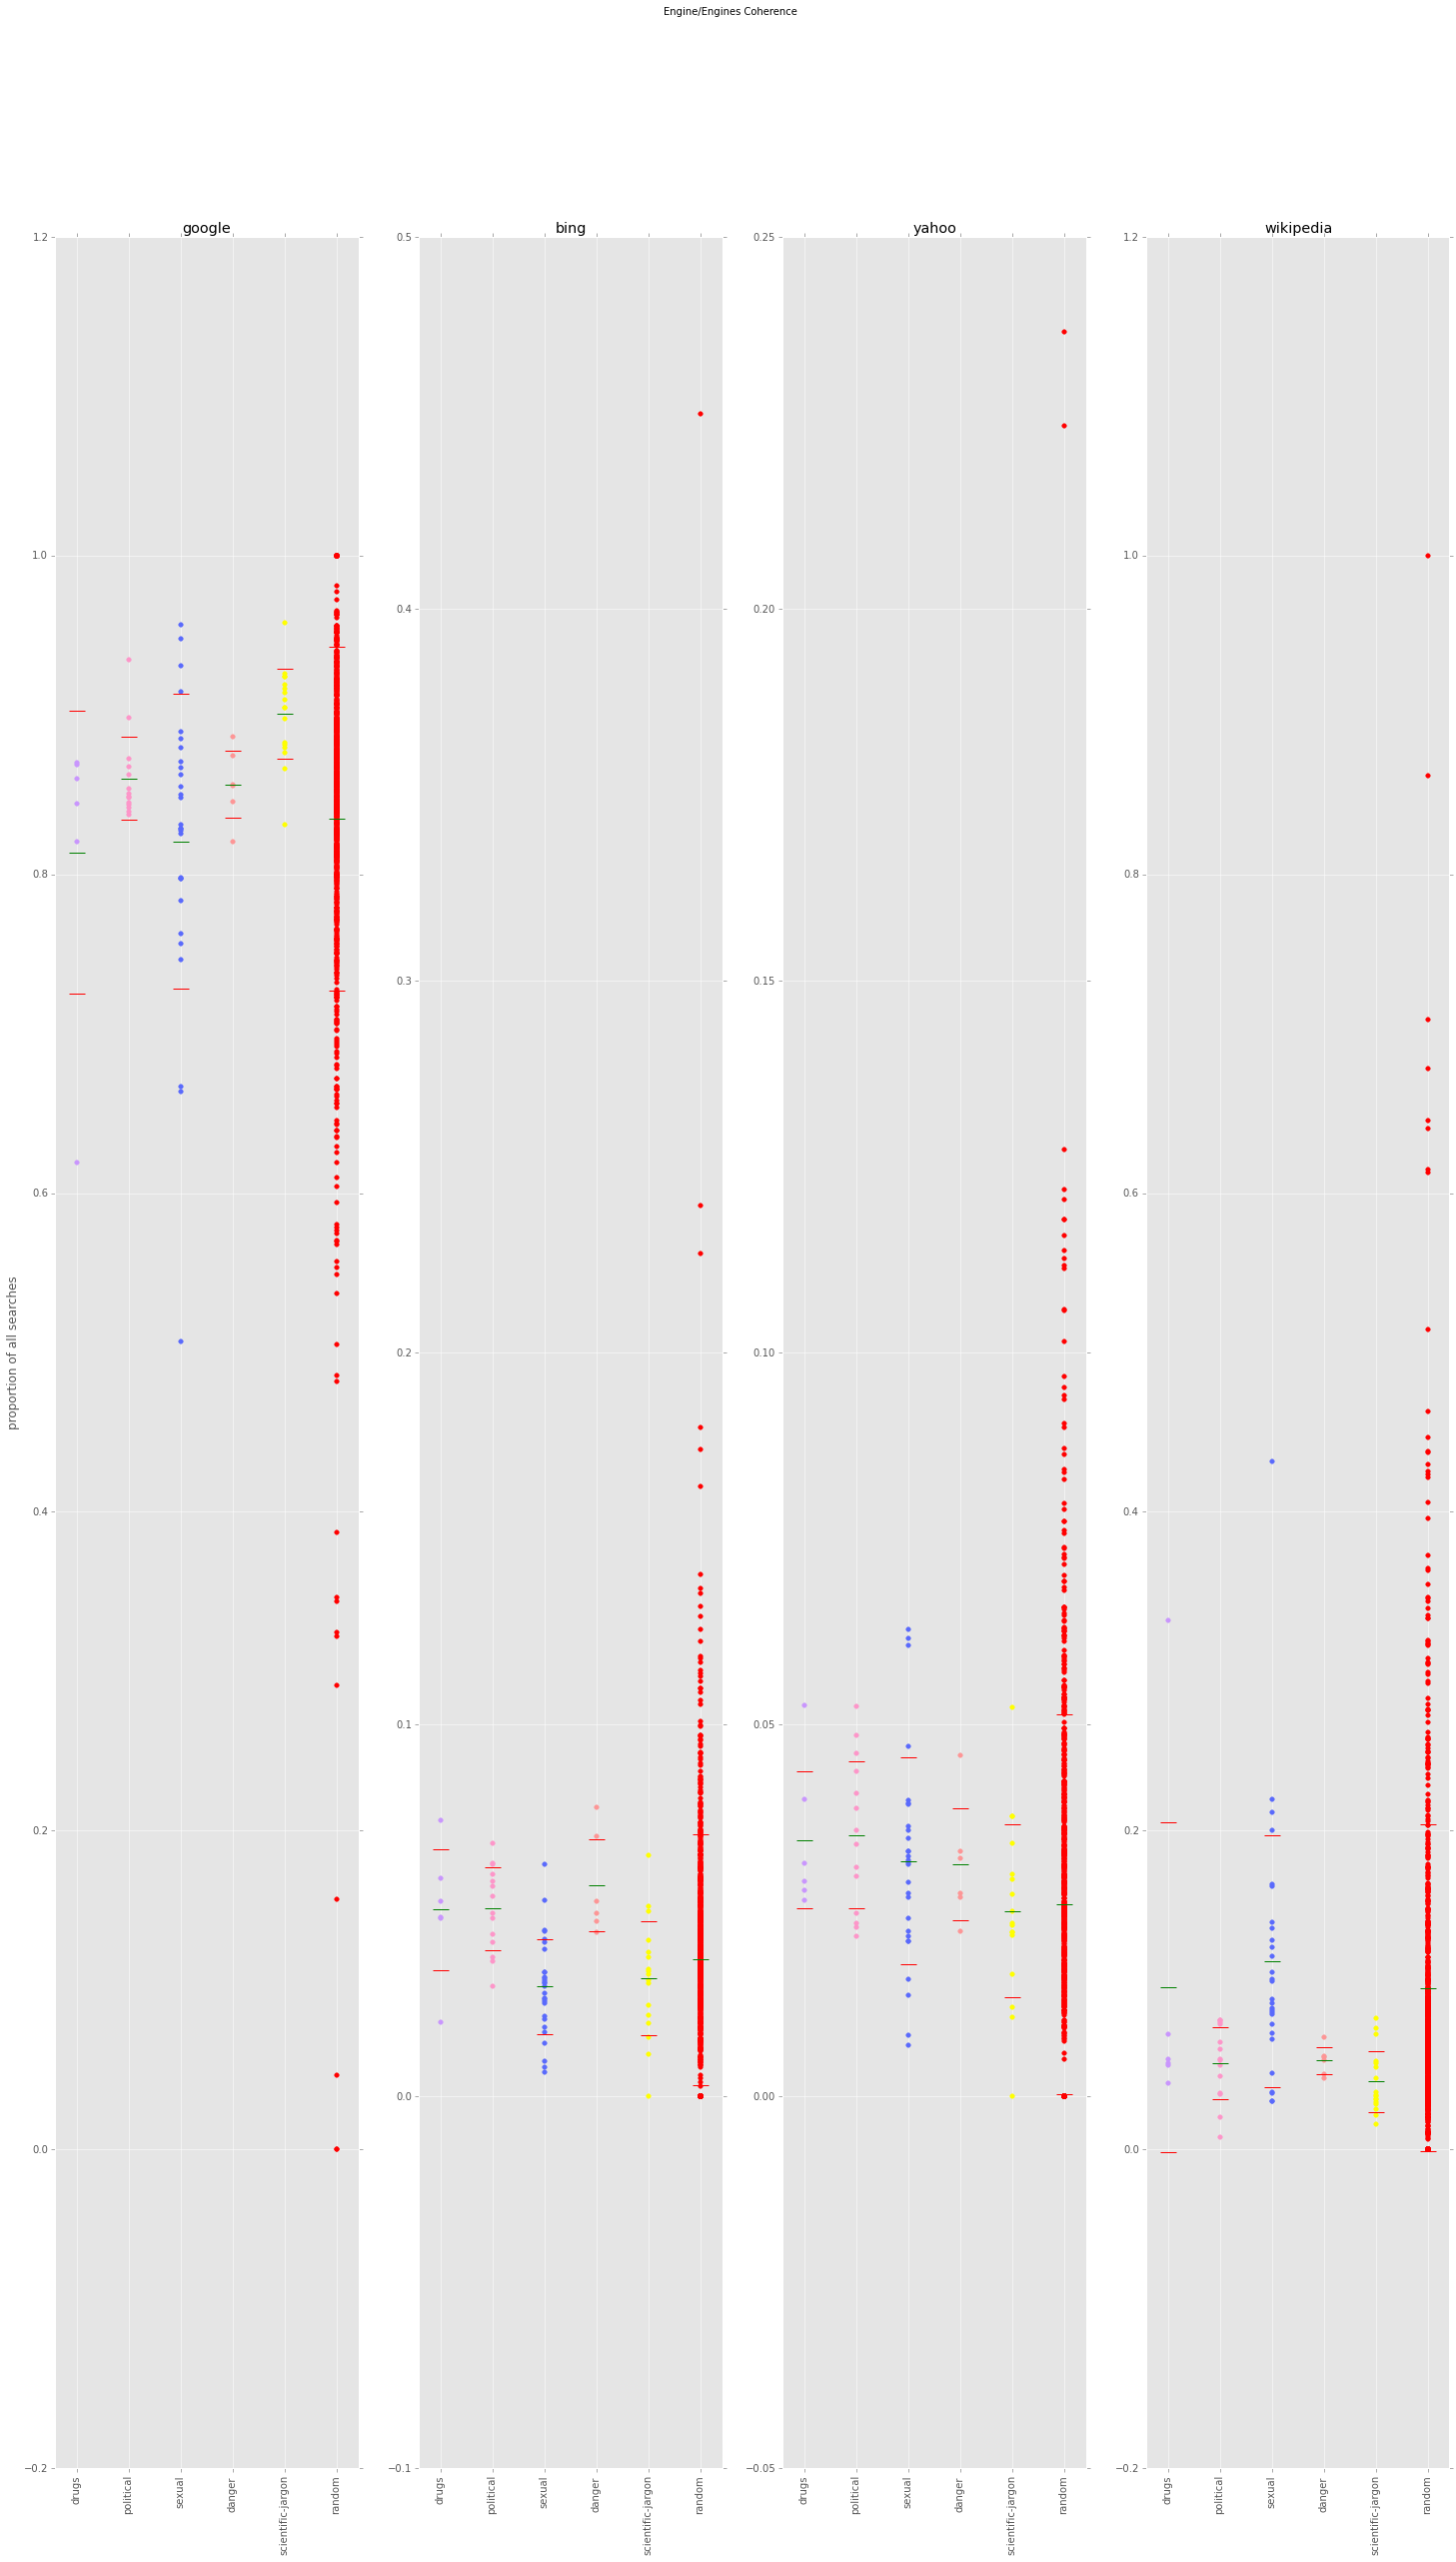

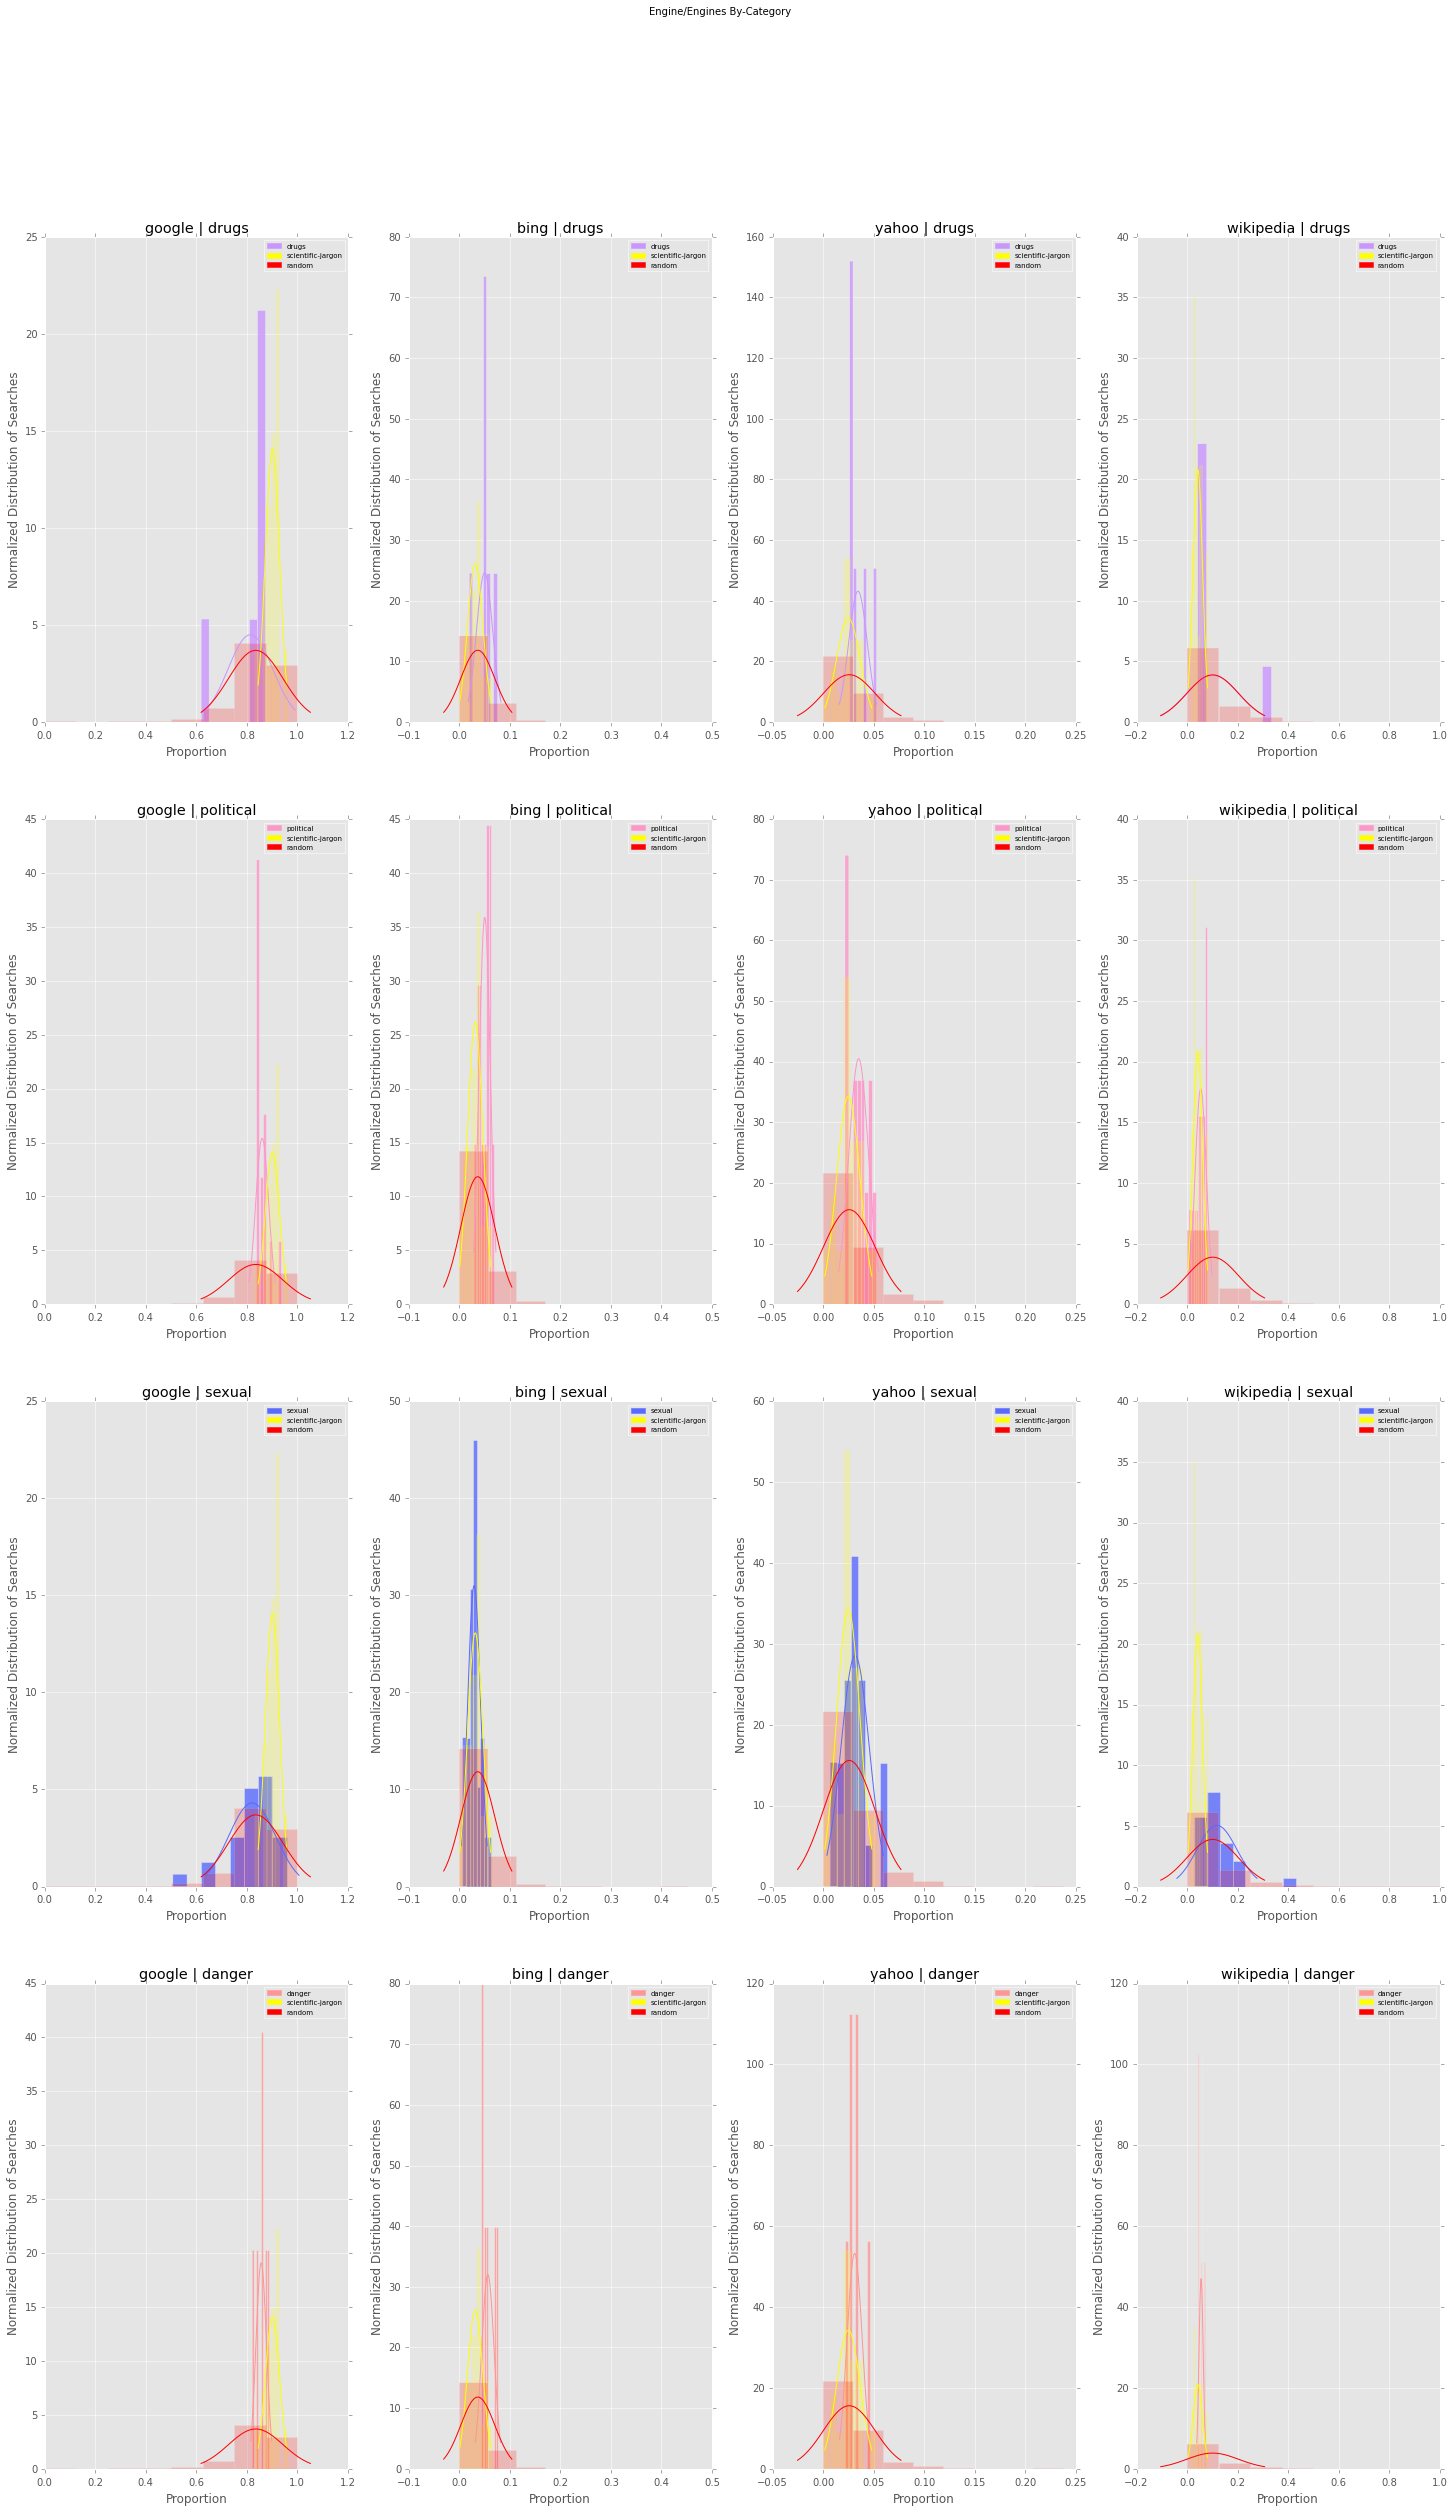

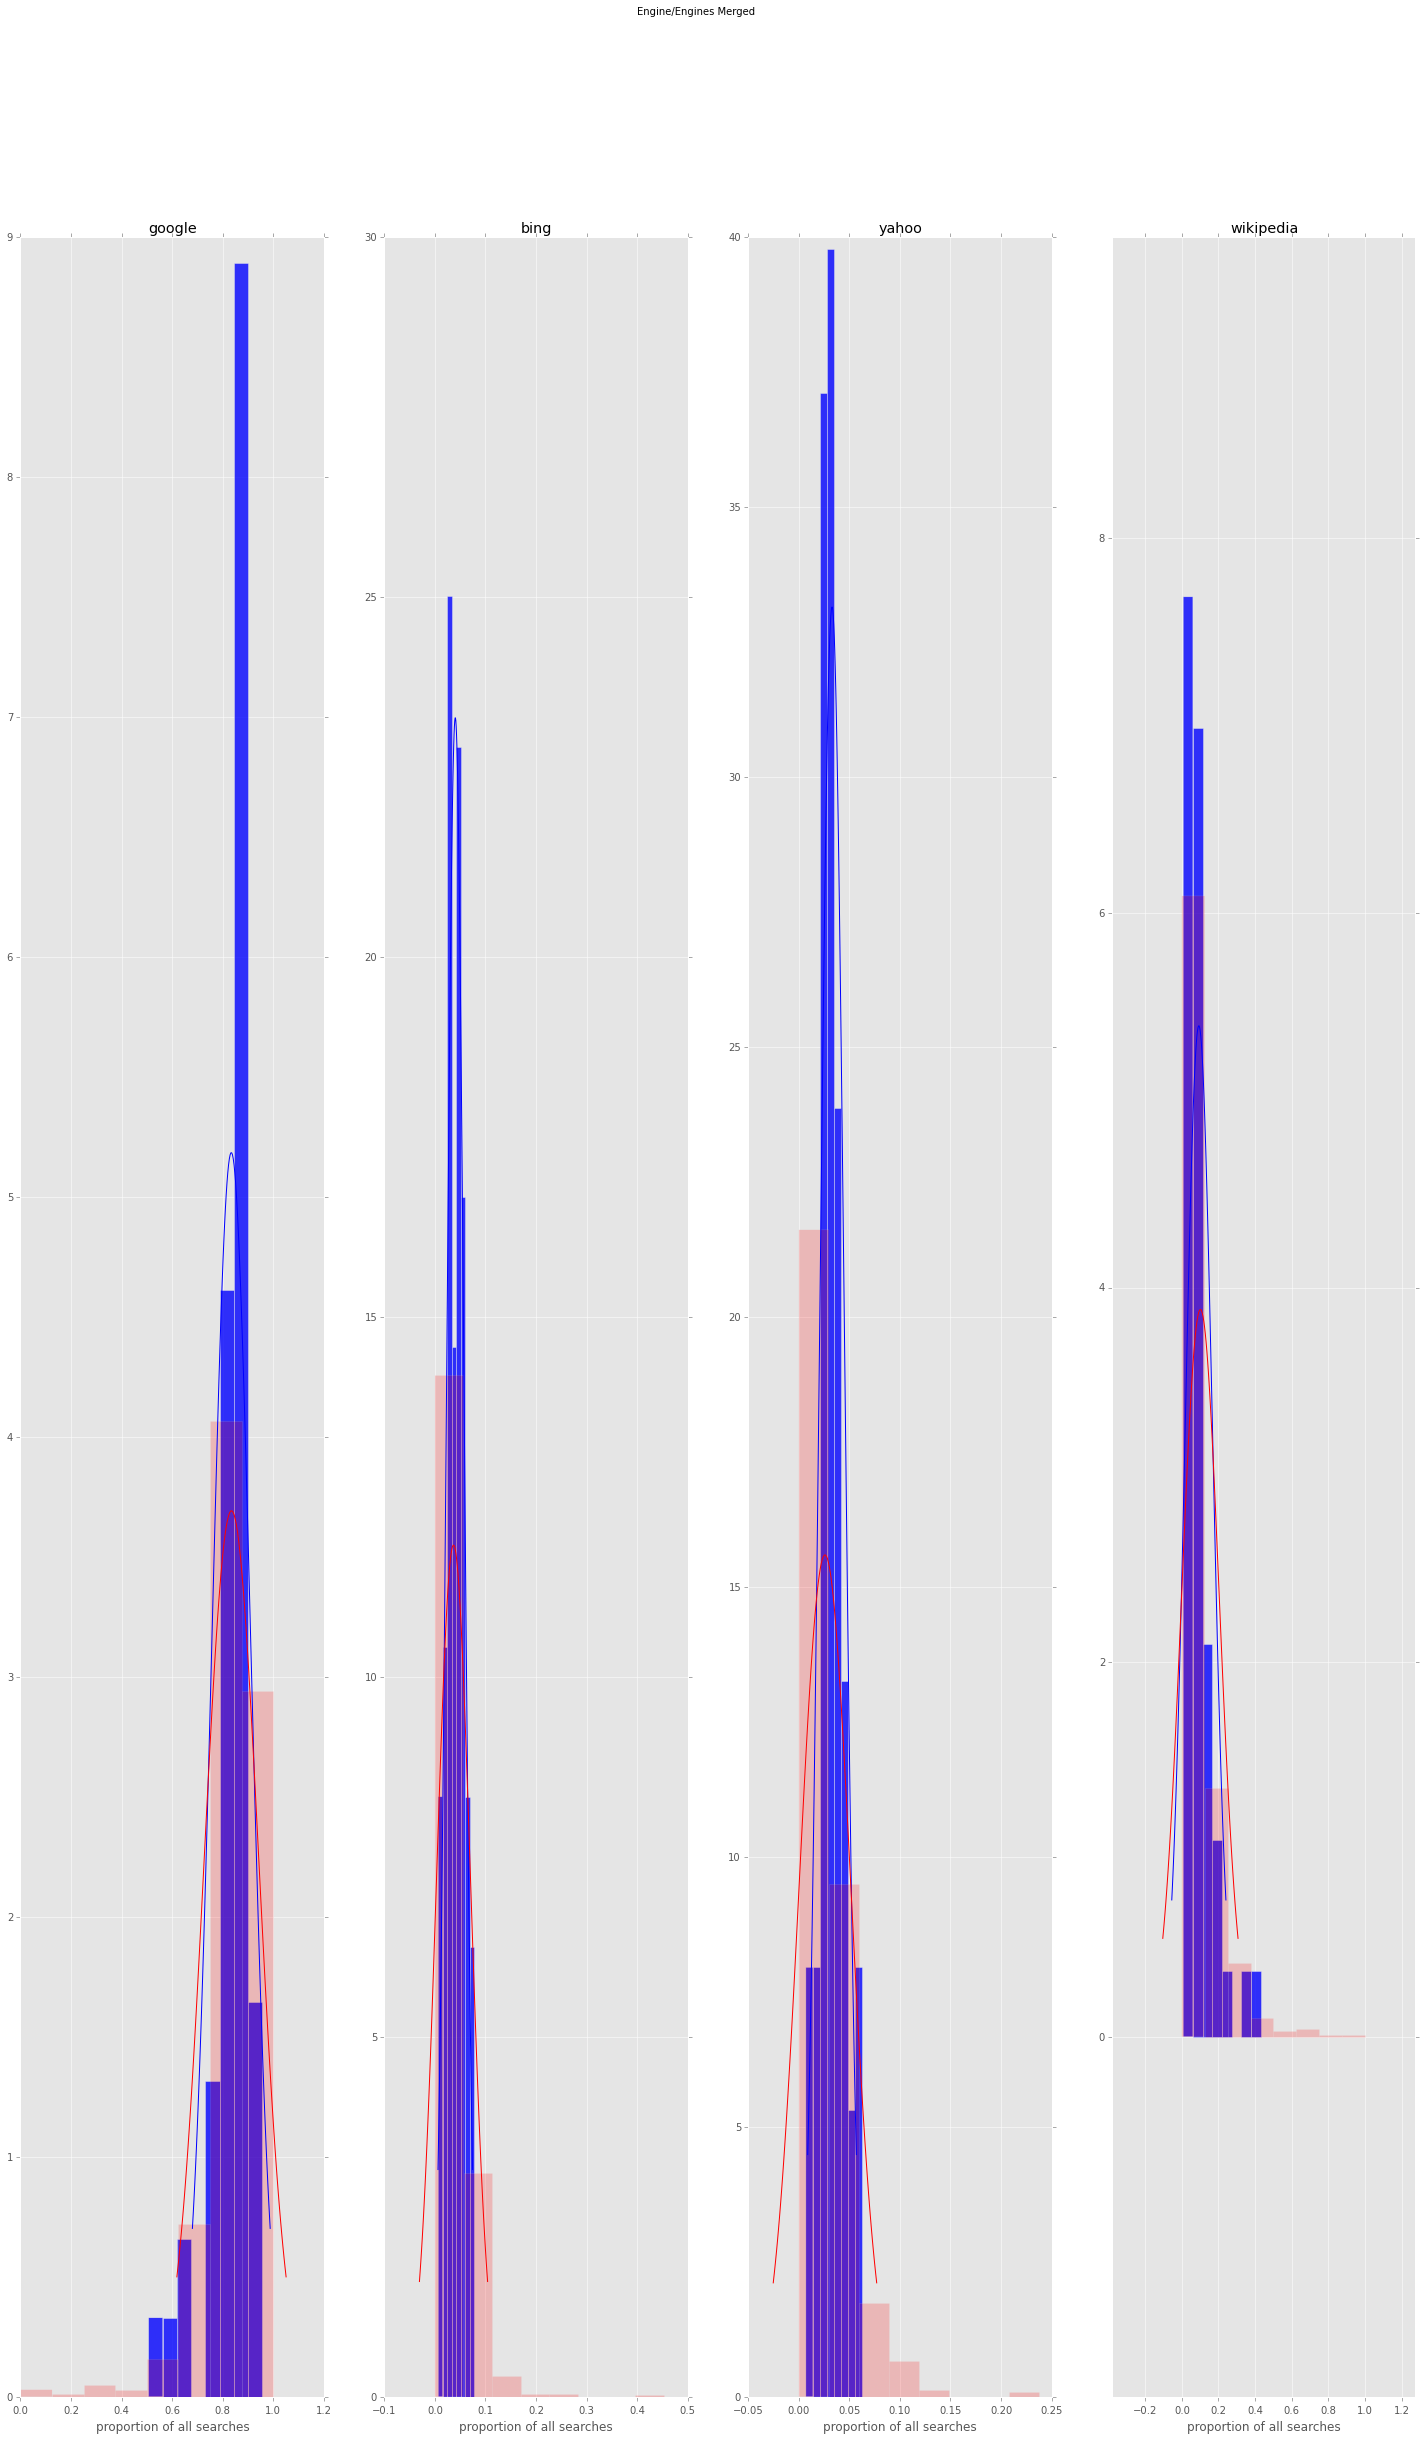

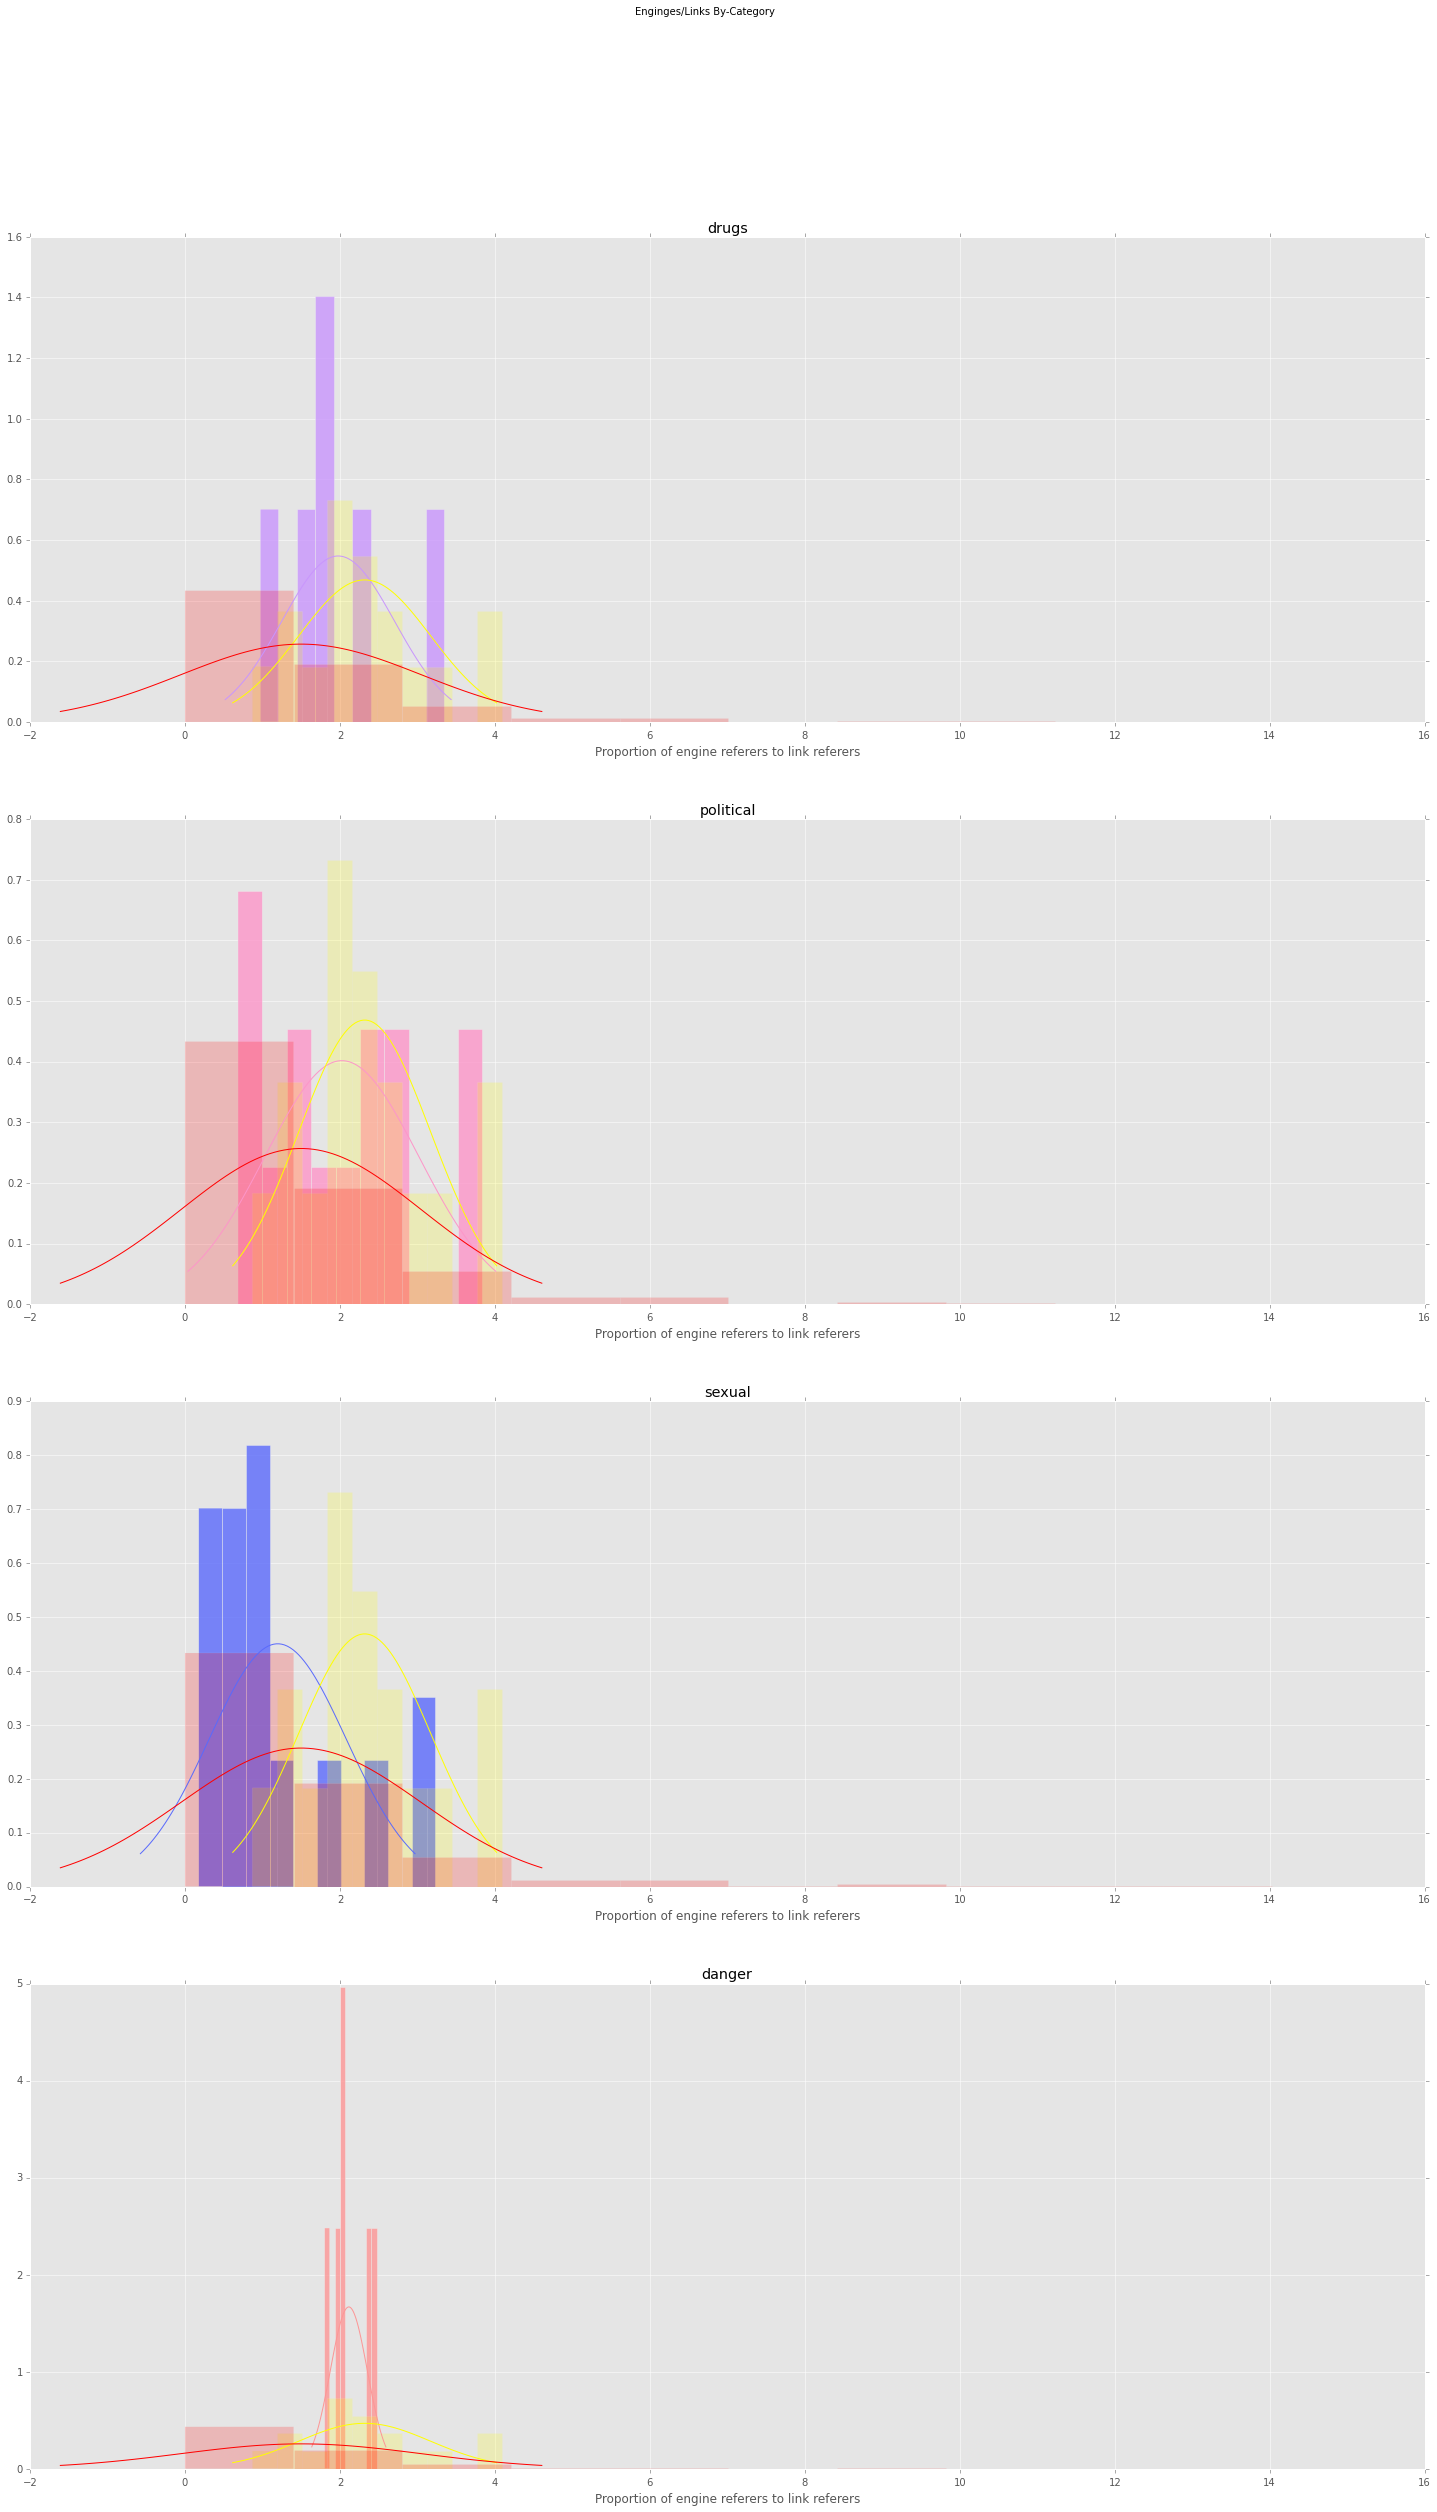

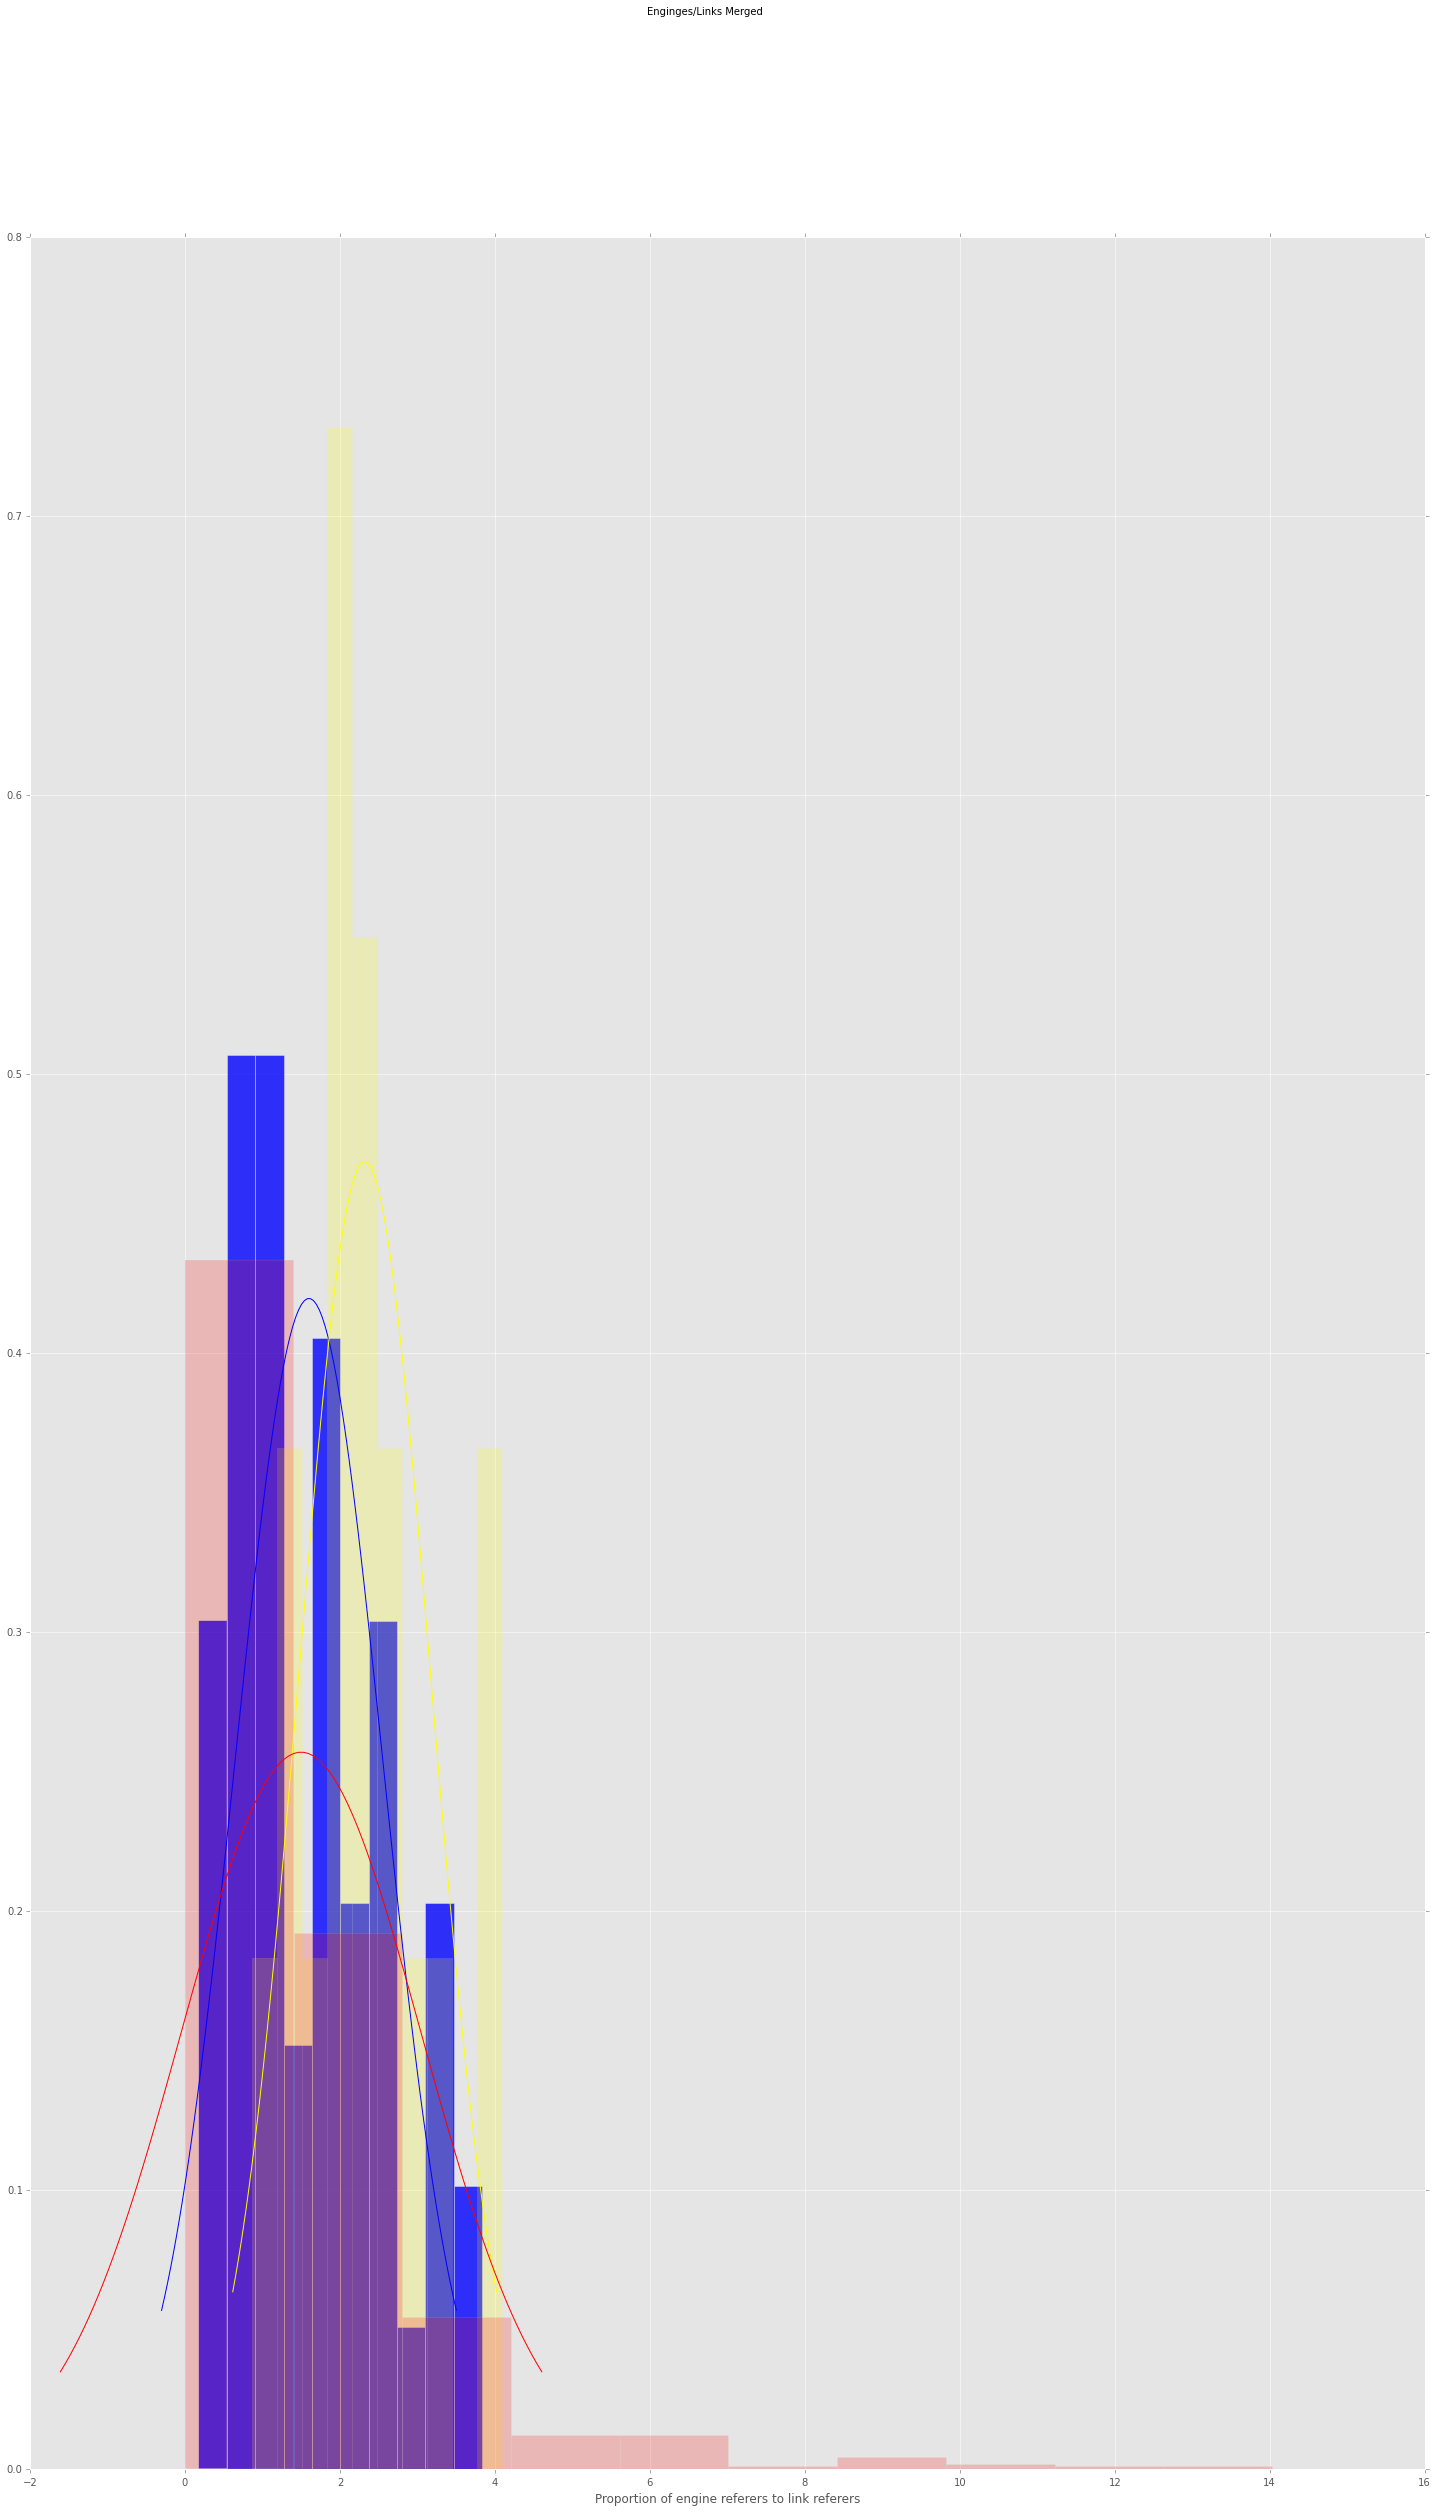

In [5]:
import instances.clickbait
clickbait_problem = WikiProblem(instances.clickbait.inst)
clickbait_problem.plot()

In [3]:
import instances.popularity
popularity_problem = WikiProblem(instances.popularity.inst)
popularity_problem.plot()

Preparing problem instance.
Failed to read table
Filling tables with query results


DatabaseError: Execution failed on sql 'SELECT n, referer FROM wikiThresh 
                                      WHERE title = 'Darkman_III:_Die_Darkman_Die' 
                                   ': current transaction is aborted, commands ignored until end of transaction block


In [ ]:
import instances.hierarchical
hierarchical_problem = WikiProblem(instances.hierarchical.inst)
hierarchical_problem.plot()

In [1]:
candidate_phrases = ['tupac','David Foster Wallace', 'paternalism']
for phrase in candidate_phrases:
    most_like(phrase)

NameError: name 'most_like' is not defined

In [2]:
maximal(10)

{'other-bing':                                                title
 0                                "Happy"_in_Galoshes
 1                               "I_Luv_You_HB"_Demos
 2                              !Women_Art_Revolution
 3                                        !!!_(album)
 4                                 !_(disambiguation)
 5                                   "A"_Is_for_Alibi
 6                                   "Babbacombe"_Lee
 7  "C"_is_for_(Please_Insert_Sophomoric_Genitalia...
 8                                          !_(album)
 9                                      "I_Want"_song,
 'other-google':                             title
 0                        (T)ERROR
 1           .net_(disambiguation)
 2              (308193)_2005_CB79
 3                (35414)_1998_AC3
 4                             +_-
 5  ...All_That_Might_Have_Been...
 6                       !_(album)
 7                     '92_Tour_EP
 8                            .wtf
 9                       